<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

## <b>Lab 5: *Naive Bayes* & KNN</b>

### **Tenggat Waktu: 16 Maret 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab5_2200123456_TaylorSwift.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 16 Maret 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.

# **Pernyataan Integritas**

In [1]:
# Isi dengan data diri Anda
NAMA = "Scudetto Ciano Syam"
KELAS = "C"
NPM = "2206083294"
USERNAME_KAGGLE = "Scudetto"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Scudetto Ciano Syam dari kelas C dengan NPM 2206083294, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Scudetto Ciano Syam)


# <b>*Naive Bayes*</b>
---

## A. Pengenalan *Naive Bayes*

Pada lab kali ini, Anda akan mengimplementasikan **Naive Bayes Classifier** dan melakukan pengukuran kinerja model. Sebelum memulai implementasi, kita akan mempelajari konsep dasar dari **Naive Bayes Classifier** terlebih dahulu.

 Algoritma Naive Bayes memprediksi peluang di masa depan berdasarkan pengalaman di masa sebelumnya sehingga dikenal sebagai Teorema Bayes. Ciri utama dari Naive Bayes Classifier ini adalah asumsi yg sangat kuat akan independensi dari masing-masing kondisi/kejadian.

Naive Bayes merupakan algoritma yang dikembangkan dari Teorema Bayes, yang memprediksi peluang suatu kejadian di masa depan berdasarkan data yang sudah ada. Ciri utama dari Naive Bayes Classifier adalah asumsi asumsi Naive Bayes untuk *class conditional density*, yaitu: “*features are conditionally independent given the class label*” (fitur-fitur dianggap independen secara kondisional jika label kelas diberikan).

> Referensi:<br>
> [Krisnadhi, A. A., Aminah, S., Azizah, A. Y., Cahyati, D., & Darari, F. (2024). *Probability, likelihood, and Naive Bayes* [Slide presentasi]. CSGE603130 - Kecerdasan Artifisial dan Sains Data Dasar, Fakultas Ilmu Komputer, Universitas Indonesia.](https://drive.google.com/file/d/104zMjysHrz5sTMrClQd9AImVxYK9LqWF/view?usp=sharing)

Bayangkan Anda ingin membangun sebuah classifier yang memprediksi golongan darah seseorang (A, B, AB, atau O) berdasarkan sifat-sifat kepribadiannya, seperti arogan, perhatian, teliti, humoris, sabar, dan sebagainya. Untuk melakukannya, Anda membuat sebuah kuesioner kepribadian dan mengumpulkan data dari banyak orang. Data ini kemudian digunakan untuk membentuk dataset yang akan menjadi dasar prediksi.

Misalkan seseorang, sebut saja Kak Lulu, mengisi kuesioner tersebut dan menyatakan bahwa dirinya adalah orang yang perhatian, humoris, teliti, dan sabar. Pertanyaannya, bisakah kita memprediksi golongan darah Kak Lulu berdasarkan data yang telah dikumpulkan?

Salah satu metode yang dapat digunakan untuk memprediksi golongan darah Kak Lulu adalah dengan **Teorema Naive Bayes**. Dengan menggunakan teorema ini, kita dapat menghitung probabilitas golongan darah Kak Lulu berdasarkan sifat-sifat kepribadian yang dimilikinya. Misalnya, jika kita ingin **menghitung peluang golongan darah Kak Lulu adalah O** karena **diketahui dia adalah orang yang perhatian**, kita dapat menggunakan Aturan Bayes seperti yang ditunjukkan di bawah ini.

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O) \cdot p(O)}{p(\text{perhatian})} = \frac{p(\text{perhatian} \mid O) \cdot p(O)}{\sum_{c \in \{A, B, AB, O \}} p(\text{perhatian} \mid c) \cdot p(c)}
$$

Nilai-nilai tersebut merujuk pada komponen utama dalam Teorema Bayes, yaitu:

1. $p(O | \text{perhatian})$ merupakan ***Posterior Probability*** dari O (jika diketahui bersifat perhatian)
2. $p(O)$ merupakan ***Prior Probability*** dari O
3. $p(\text{perhatian} | O)$ merupakan ***Likelihood*** atau ***Class Conditional Density*** dari O
4. ${\sum_{c \in \{A, B, AB, O \}} p(\text{perhatian} \mid c).p(c)}$ merupakan ***Marginalizer*** dari $p(\text{perhatian})$

Ketiga nilai tersebut (prior, likelihood, dan marginal likelihood) bisa dihitung berdasarkan data yang dikumpulkan dari kuesioner. Umumnya, kita tidak hanya menghitung $P(O | \text{perhatian})$, tetapi juga menghitung $P(A | \text{perhatian})$, $P(B | \text{perhatian})$, dan $P(AB | \text{perhatian})$. Setelah keempat probabilitas posterior ini dihitung, golongan darah dengan probabilitas tertinggi akan diprediksi sebagai golongan darah Kak Lulu.

Namun, peneliti biasanya menginginkan rumus yang menggunakan jumlah variabel sesedikit mungkin. Jika kita perhatikan lebih lanjut, penyebut dari $p(O|\text{perhatian})$ dibagi oleh $p(\text{perhatian})$. Sama halnya dengan $p(A | \text{perhatian})$, $p(B | \text{perhatian})$, dan $P(AB | \text{perhatian})$ yang juga dibagi dengan $p(\text{perhatian})$ seperti yang dapat dilihat pada rumus-rumus di bawah ini.

$$
p(A \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid A).p(A)}{p(\text{perhatian})}
$$

<br>

$$
p(B \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid B).p(B)}{p(\text{perhatian})}
$$

<br>

$$
p(AB \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid AB).p(AB)}{p(\text{perhatian})}
$$

<br>

$$
p(O \mid \text{perhatian}) = \frac{p(\text{perhatian} \mid O).p(O)}{p(\text{perhatian})}
$$

Jika keempat probabilitas posterior di atas memiliki penyebut atau pembagi yang sama, yaitu $p(\text{perhatian})$, maka urutan nilai dari yang terbesar hingga terkecil **tidak akan berubah** meskipun penyebutnya diabaikan. Hal ini karena penyebut yang sama hanya berfungsi sebagai faktor penskalaan yang tidak memengaruhi urutan relatif antara probabilitas tersebut.

Dengan demikian, kita tidak perlu menghitung nilai $p(\text{perhatian})$ secara eksplisit. Sebagai gantinya, kita cukup membandingkan pembilangnya saja:

$$
p(O \mid \text{perhatian}) \propto p(\text{perhatian} \mid O) \cdot p(O)
$$

<br>

Di sini, $\propto$ berarti **proporsional terhadap** yang menggantikan $\frac{1}{p(\text{perhatian})}$. $\propto$ berarti *posterior* probabilitas itu **sebanding** dengan perkalian antara *likelihood*-nya dengan *prior*.

Nah, bagaimana faktor seperti humoris, teliti, sabar, atau sifat seseorang lainnya? Secara matematis, kita bisa membuatnya menjadi seperti ini.


$$
p(O \mid P,H,T,S) = \frac{p(P,H,T,S \mid O) \cdot p(O)}{p(P,H,T,S)}
$$

<br>

$$
p(O \mid P,H,T,S) \propto {p(P,H,T,S \mid O)p(O)}
$$

Ingat bahwa dalam Naive Bayes kita mengasumsikan bahwa setiap fitur dianggap independen secara kondisional jika label kelas diberikan. Dalam hal ini kita mengasumsikan bahwa faktor seperti perhatian, humoris, teliti, dan sabar bersifat ***conditionally independet*** apabila diketahui seseorang tersebut bergolongan darah O. Dengan demikian, kita bisa ubah rumusnya menjadi:

$$
p(O \mid P,H,T,S) \propto {p(P \mid O) \cdot p(H \mid O) \cdot p(H \mid O) \cdot p(T \mid O) \cdot p(S \mid O) \cdot p(O)}
$$

Keterangan :
- P: Perhatian
- H: Humoris
- T: Teliti
- S: Sabar
- O: Golongan darah O

## B. Pengenalan *Naive Bayes* Dalam Scikit-learn

Scikit-learn menyediakan beberapa variasi model naive bayes yang dapat digunakan, antara lain:

| Nama Model | Nama Modul |
| ----------- | --------- |
| Gaussian Naive Bayes | `sklearn.naive_bayes.GaussianNB` |
| Multinomial Naive Bayes | `sklearn.naive_bayes.MultinomialNB` |
| Complement Naive Bayes | `sklearn.naive_bayes.ComplementNB` |
| Bernoulli Naive Bayes | `sklearn.naive_bayes.BernoulliNB` |
| Categorical Naive Bayes | `sklearn.naive_bayes.CategoricalNB` |

Adapun kegunaan masing-masing model antara lain:
- Gaussian Naive Bayes,
Model ini cocok digunakan untuk data numerik yang mengikuti distribusi Gaussian (normal) dan bersifat kontinu.

- Multinomial Naive Bayes,
Model ini mengasumsikan bahwa data memiliki distribusi multinomial. Distribusi multinomial menggambarkan probabilitas dari jumlah data pada sejumlah kategori. Model ini cocok digunakan untuk fitur yang merepresentasikan jumlah atau frekuensi, seperti dalam klasifikasi teks. Contohnya adalah frekuensi kemunculan kata dalam dokumen.

- Complement Naive Bayes,
Complement Naive Bayes merupakan varian dari Multinomial Naive Bayes. Model ini dikembangkan untuk mengatasi kelemahan Multinomial Naive Bayes pada dataset yang **imbalanced** (tidak seimbang), di mana distribusi data tidak seragam. Complement Naive Bayes cocok digunakan untuk dataset dengan imbalanced class, karena mengurangi risiko overfitting terhadap class yang dominan. <br>
[Comparing a Variety of Naive Bayes Classification Algorithms](https://towardsdatascience.com/comparing-a-variety-of-naive-bayes-classification-algorithms-fc5fa298379e)

- Bernoulli Naive Bayes,
Model ini mirip dengan Multinomial Naive Bayes, tetapi dirancang untuk data yang bersifat **binary** (0 atau 1). Contoh penggunaannya adalah pada data seperti gender (pria/wanita) atau representasi one-hot encoding. <br>
[Bernoulli Naive Bayes](https://iq.opengenus.org/bernoulli-naive-bayes/)

- Categorical Naive Bayes,
Model ini digunakan untuk data yang nilainya terdistribusi secara kategorikal. Jika data bersifat kontinu, perlu dilakukan transformasi ke bentuk diskret terlebih dahulu sebelum menggunakan model ini. Contoh penggunaannya adalah pada data seperti warna mata, ras, atau golongan darah.

Selengkapnya dapat dilihat pada dokumentasi modul [sklearn.naive_bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).

## C. *Hands-on Naive Bayes*

Dataset `caesarian_section_classification.csv` berisi tentang informasi dilakukannya operasi caesar atau tidak dari 80 ibu hamil dengan karakteristik masalah persalinan yang penting pada bidang medis.

Informasi dataset:
* `Age`: Umur
* `Delivery No`: Status (Timely, Premature, Latecomer)
* `Blood of Pressure`: Tekanan Darah (Low, Normal, High)
* `Heart Problem`: Memiliki masalah penyakit jantung (apt, inept)
* `Cesarian`: Dilakukan operasi caesar (Yes, No)

Sumber dataset: https://www.kaggle.com/amir75/caesarean-section-classification


### *Import Dataset*

In [3]:
# import library dan data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

caesarian = pd.read_csv("caesarian_section_classification.csv")
# caesarian = pd.read_csv("https://drive.google.com/uc?export=download&id=1zu78EgJTrBmzz2TwXXyl_1sZz1Yiu3GZ")
caesarian.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,Timely,High,apt,No
1,26,Timely,Normal,apt,Yes
2,26,Premature,Normal,apt,No
3,28,Timely,High,apt,No
4,22,Timely,Normal,apt,Yes


In [4]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", caesarian.shape[0])
print("Kolom : ", caesarian.shape[1])

----Informasi Baris dan Kolom----
Baris :  80
Kolom :  5


In [5]:
# Mencari jumlah nilai unik pada kolom yang bertipe kategorikal

for col in caesarian.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(caesarian[col].value_counts(), '\n')

No. of unique values in column Delivery No:
Delivery No
Timely       46
Premature    17
Latecomer    17
Name: count, dtype: int64 

No. of unique values in column Blood of Pressure:
Blood of Pressure
Normal    40
High      20
Low       20
Name: count, dtype: int64 

No. of unique values in column Heart Problem:
Heart Problem
apt      50
inept    30
Name: count, dtype: int64 

No. of unique values in column Caesarian:
Caesarian
Yes    46
No     34
Name: count, dtype: int64 



### *Preprocessing*

In [ ]:
# mengecek nilai null pada data
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na * 100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [7]:
cek_null(caesarian)

Tidak ditemukan missing value pada dataset


In [8]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data: " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data: 8


Terdapat 8 data duplikat, maka kita perlu drop data tersebut terlebih dahulu.

In [9]:
caesarian.drop_duplicates(inplace = True)
caesarian.reset_index(drop=True, inplace=True)
print("Jumlah duplikasi data: " + str(caesarian.duplicated().sum()))

Jumlah duplikasi data: 0


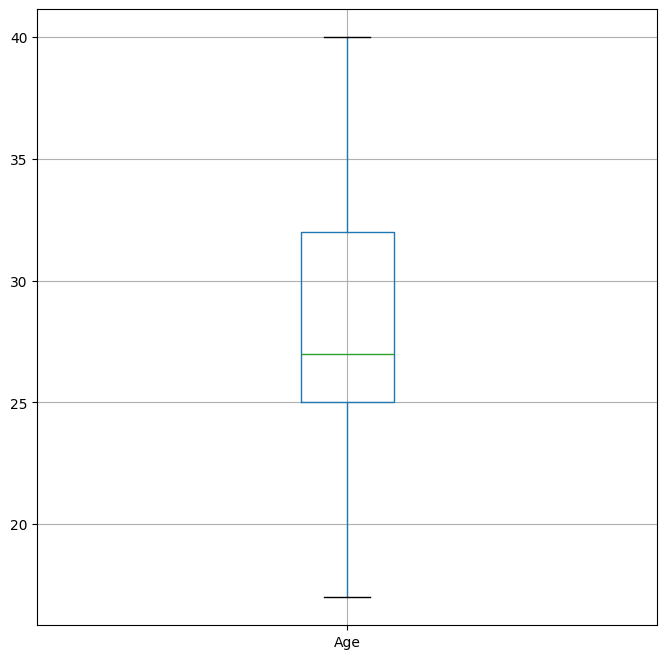

In [10]:
# mengecek keberadaan outlier
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
caesarian.boxplot(figsize=(8, 8))
plt.show()

Tidak tampak ada outlier pada data

### Menentukan *Independent Variable* dan *Dependent Variable*

Pada langkah ini, kita akan menentukan variabel independen (fitur) dan variabel dependen (target). Variabel dependen adalah variabel yang akan diprediksi, sedangkan variabel independen adalah variabel yang digunakan untuk membuat prediksi. Pada dataset ini, variabel **caesarian** dipilih sebagai variabel dependen, sedangkan variabel lainnya menjadi variabel independen.

Karena data yang diberikan bertipe kategorikal, maka kita perlu melakukan transformasi agar data dapat diolah oleh mesin. Ada beberapa teknik transformasi yang dapat dilakukan, diantaranya:
- One-hot encoding
- Label encoding
- Target encoding
- dan lain-lain. (Dapat dibaca slide kuliah Feature Engineering)

Teknik-teknik transformasi, memiliki kelebihan dan kelemahannya masing-masing (teman-teman mungkin bisa membacanya di internet terkait tujuan dari setiap teknik). Pada kasus ini, kita akan menggunakan **label encoding** karena teknik ini memastikan bahwa data kategorikal yang memiliki urutan (ordinal) dapat diproses dengan baik. Label encoding mengubah setiap kategori menjadi nilai numerik yang sesuai dengan urutan atau hierarki kategori tersebut.

**Catatan:**<br>
Pemilihan teknik transformasi sangat bergantung pada karakteristik data dan tujuan analisis. Pastikan untuk memilih teknik yang sesuai dengan data.

In [11]:

# Mapping untuk kolom Delivery No
delivery_mapping = {
	'Timely': 0,
	'Premature': 1,
	'Latecomer': 2
}

# Mapping untuk kolom Blood of Pressure
blood_pressure_mapping = {
	'Low': 0,
	'Normal': 1,
	'High': 2
}

# Mapping untuk kolom Heart Problem
heart_problem_mapping = {
	'apt': 0,
	'inept': 1
}

# Mapping untuk kolom Caesarian
caesarian_mapping = {
	'No': 0,
	'Yes': 1
}

caesarian_encoded = caesarian.copy()
caesarian_encoded['Delivery No'] = caesarian['Delivery No'].map(delivery_mapping)
caesarian_encoded['Blood of Pressure'] = caesarian['Blood of Pressure'].map(blood_pressure_mapping)
caesarian_encoded['Heart Problem'] = caesarian['Heart Problem'].map(heart_problem_mapping)
caesarian_encoded['Caesarian'] = caesarian['Caesarian'].map(caesarian_mapping)

caesarian_encoded.head()

,Age,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,0,2,0,0
1,26,0,1,0,1
2,26,1,1,0,0
3,28,0,2,0,0
4,22,0,1,0,1


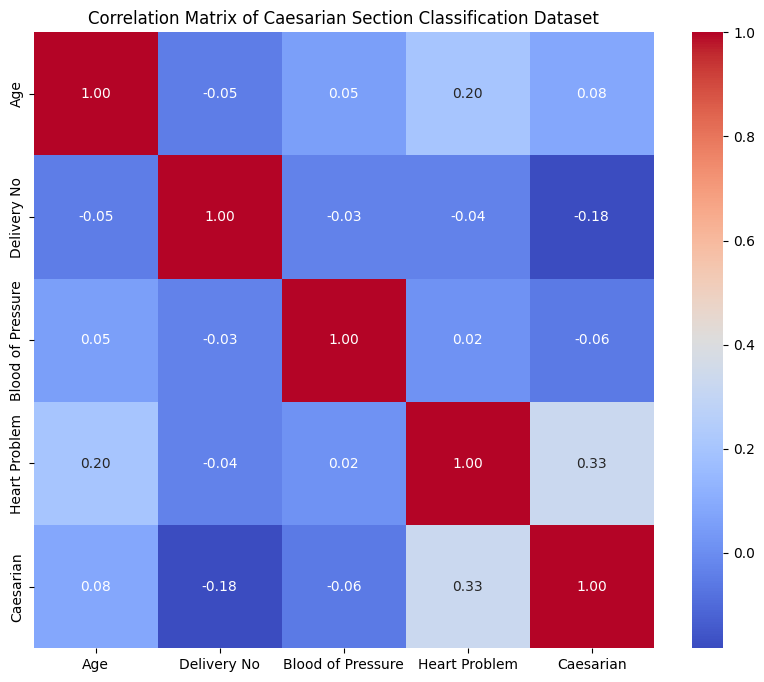

In [12]:
# Calculate the correlation matrix
correlation_matrix = caesarian_encoded.corr(method='pearson')

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Caesarian Section Classification Dataset')
plt.show()

> Dapat dilihat bahwa korelasi setiap fitur terhadap target menunjukkan angka yang rendah. Hal ini sesuai dengan asumsi dalam Naive Bayes, yaitu setiap fitur independen secara kondisional jika label kelas diketahui.

In [13]:
# Variabel independen

X = caesarian_encoded.drop(["Caesarian", "Age"], axis = 1)
X.head()

,Delivery No,Blood of Pressure,Heart Problem
0,0,2,0
1,0,1,0
2,1,1,0
3,0,2,0
4,0,1,0


Kita drop kolom `Age` karena sebagian besar fitur lain merupakan fitur kategorikal sehingga kita akan menggunakan Categorical Naive Bayes.

In [14]:
# Variabel dependen

y = caesarian_encoded["Caesarian"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Caesarian, dtype: int64

### *Classification*

Klasifikasi menggunakan Naive Bayes dapat dilakukan dengan memanfaatkan package `sklearn`. Dalam proses ini, kita membutuhkan data training dan data testing. Kita akan mengambil **20%** dari data sebagai data testing dan sisanya akan menjadi data training. Berikut adalah kode program untuk membagi data menjadi data training dan testing:

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Melakukan splitting terhadap data train dan test (0.2 test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Selanjutnya, kita akan melakukan cross-validation dengan `n_splits=5`. Cross-validation digunakan untuk membagi dataset menjadi beberapa bagian (*fold*). Strategi ini membantu menghasilkan model yang lebih stabil performanya dan menghindari overfitting.

In [16]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Setelah itu, kita akan mengaktifkan fungsi klasifikasi Naive Bayes, mengevaluasi hasil cross-validation, dan melatih model menggunakan data training.

In [17]:
from sklearn.naive_bayes import CategoricalNB

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = CategoricalNB()

In [18]:
# Melakukan evaluasi cross-validation
scores = cross_val_score(modelnb, X_train, y_train, cv=kfold)

In [19]:
# Menampilkan skor dari setiap fold
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.75       0.58333333 0.63636364 0.63636364 0.45454545]
Mean accuracy: 0.6121212121212121


Dari hasil cross-validation, terlihat bahwa skor akurasi bervariasi di setiap fold, dengan rata-rata 0.612.

Selanjutnya, kita akan melatih model menggunakan data training dan melakukan prediksi pada data testing.

In [20]:
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
modelnb.fit(X_train, y_train)

CategoricalNB()

Langkah selanjutnya yang akan kita lakukan adalah menentukan hasil prediksi dari x_test.

In [21]:
# Prediksi data test

y_pred = modelnb.predict(X_test)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [0 1 1 1 1 1 0 0 0 1 1 1 0 1 1]


Output kode program y_pred adalah hasil prediksi operasi caesar. Kemudian, hasil tersebut akan kita bandingkan dengan data aktualnya, yaitu y_test dengan menggunakan kode program berikut ini.

In [22]:
# Array data test
print("Actual:", np.array(y_test))

Actual: [1 1 1 0 0 1 0 0 0 1 1 1 1 1 0]


### *Classification Report*

Setelah model dilatih dan diuji, kita perlu mengevaluasi performanya. Beberapa metrik yang digunakan adalah **accuracy**, **precision**, **recall**, dan **f1-score**. Selain itu, kita juga akan menampilkan confusion matrix untuk melihat ketepatan prediksi secara detail.

In [23]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

def evaluate_classifier_performance(prediction, y_test):

    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report:\n")
    print(classification_report(y_test, prediction, zero_division=0))
    print()

    # Confusion Matrix
    print("Confusion Matrix:")
    y_actual = pd.Series(np.array(y_test), name="actual")
    y_pred = pd.Series(np.array(prediction), name="prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()

    # Informasi lengkap
    print("Butuh informasi lebih lengkap? Silakan simak di bawah ini:")
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro', zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro', zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro', zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro', zero_division=0))

In [24]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.70      0.78      0.74         9

    accuracy                           0.67        15
   macro avg       0.65      0.64      0.64        15
weighted avg       0.66      0.67      0.66        15


Confusion Matrix:


prediction,0,1
actual,,
0,3,3
1,2,7



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6666666666666666
F1 Macro Average: 0.6411483253588517
F1 Micro Average: 0.6666666666666666
Precision Macro Average: 0.6499999999999999
Precision Micro Average: 0.6666666666666666
Recall Macro Average: 0.6388888888888888
Recall Micro Average: 0.6666666666666666


Berdasarkan hasil evaluasi, performa model tidak terlalu baik. Hal ini terlihat dari nilai **accuracy** dan metrik lainnya yang rendah. Beberapa kemungkinan penyebabnya adalah:
1. Dataset yang Tidak Seimbang<br>
Perbandingan jumlah tiap kelas dalam dataset tidak seimbang, menyebabkan model cenderung bias terhadap kelas yang lebih dominan.
2. Pemilihan Algoritma yang Kurang Sesuai <br>
Algoritma Naive Bayes mungkin tidak cocok untuk karakteristik data yang dimiliki. Beberapa algoritma hanya bekerja optimal pada distribusi data tertentu.

### <b>Pendekatan Lain</b>
Pendekatan yang lebih kompleks dalam menerapkan Naive Bayes adalah dengan memisahkan fitur numerik dan kategorik, lalu melatih dua model Naive Bayes yang berbeda sesuai dengan jenis datanya. Gaussian Naive Bayes untuk fitur numerik dan Categorical Naive Bayes untuk fitur kategorik. Setelah kedua model dilatih, hasil prediksi probabilitasnya dapat digabungkan dengan mengalikan nilai probabilitas dari masing-masing model, dengan asumsi bahwa fitur-fitur tersebut bersifat independen. Strategi ini memungkinkan pemrosesan data yang lebih sesuai dengan karakteristiknya masing-masing sehingga mahasiswa dapat bereksperimen dan mengevaluasi efektivitas pendekatan ini dalam meningkatkan performa klasifikasi.

# **KNN (K-Nearest Neighbor)**
---

## A. Pengenalan KNN

Sesuai dengan namanya (*nearest neighbors*), algoritma KNN mengklasifikasikan suatu data baru dengan melihat kedekatan data tersebut terhadap data lama yang telah ada. Contohnya, jika Anda memiliki dataset yang berisi informasi rumah dengan label **rumah mewah** dan **rumah tidak mewah**, KNN akan menyimpan informasi mengenai kemiripan fitur-fitur seperti luas rumah dan harga rumah. Ketika data rumah baru dimasukkan, KNN akan mengecek kesamaan fitur-fitur tersebut terhadap data lama yang telah dipelajari. Hasil pengecekan ini akan digunakan untuk menentukan klasifikasi rumah baru tersebut.

## B. Pengenalan KNN Dalam Scikit-learn

Pada library `scikit-learn`, terdapat beberapa parameter penting yang perlu diperhatikan saat mengimplementasikan algoritma KNN. Berikut adalah rangkuman singkatnya:

* `n_neighbors`  
	* Merepresentasikan jumlah **K** (tetangga terdekat) yang digunakan untuk menentukan klasifikasi. Nilai *default*: 5.
* `algorithm`  
	* Merepresentasikan algoritma yang digunakan untuk mencari tetangga terdekat.
	* Pilihan algoritma: `auto` (*default*), `ball_tree`, `kd_tree`, dan `brute`.
* `p`  
	* Merepresentasikan parameter untuk rumus jarak Minkowski.
	* Jika `p=1`, rumus jarak yang digunakan adalah Manhattan Distance.
	* Jika `p=2`, rumus jarak yang digunakan adalah Euclidean Distance (*default*).
* `metric`  
	* Merepresentasikan rumus jarak yang digunakan untuk menghitung kedekatan antara data point. Nilai *default*: `minkowski`.
	* Beberapa opsi rumus jarak yang tersedia: `euclidean`, `manhattan`, `cosine`, `jaccard`, `hamming`, dll.
	* Dokumentasi mengenai rumus jarak yang dapat digunakan dapat diakses di [sini](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics).

> Referensi: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Kita perlu memperhatikan rumus jarak yang digunakan dan juga jumlah K yang optimal. Strategi yang dapat diterapkan untuk mencari nilai K yang optimal adalah dengan **cross-validation**. Sedangkan untuk metric beserta parameternya bisa dipilih berdasarkan sifat data. Jika semua data numerik, kita bisa memilih untuk menggunakan **Euclidean** atau **Manhattan** distance. Jika semua data kategorikal, kita bisa menggunakan **Jaccard** distance.

Permasalahan yang sering ditemukan saat mengimplementasikan KNN adalah ketika variabel independen terdiri dari data **kategorikal** dan **numerik**. Banyak praktisi yang meyakini untuk menggunakan algoritma lain jika menemui masalah tersebut, seperti menggunakan algoritma **decision tree**, **random forest**, **neural network**, **deep learning**, dan lain-lain.

## C. *Hands-on* KNN

Selanjutnya, kita akan mencoba mengimplementasikan KNN untuk mengklasifikasikan jenis kaca yang harus digunakan berdasarkan dataset `glass_classification.csv` yang diambil dari [Glass Identification Data Set](https://www.kaggle.com/datasets/danushkumarv/glass-identification-data-set) dengan beberapa modifikasi.

Berikut adalah informasi dari dataset di atas:
- `RI`: Refractive Index
- `Na`: Sodium (unit measurement: weight percent in the corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `type`: Type of glass


### *Import Dataset*

In [25]:
glass = pd.read_csv("glass_classification.csv").drop("Id", axis=1)
# glass = pd.read_csv("https://drive.google.com/uc?export=download&id=1OrumHSve0SHbb_XW-8slp12BT9U9jPMu").drop("Id", axis=1)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
print("----Informasi Baris dan Kolom----")
print("Baris : ", glass.shape[0])
print("Kolom : ", glass.shape[1])

----Informasi Baris dan Kolom----
Baris :  214
Kolom :  10


### *Preprocessing*

In [27]:
cek_null(glass)

Tidak ditemukan missing value pada dataset


In [28]:
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data: " + str(glass.duplicated().sum()))

Jumlah duplikasi data: 1


In [29]:
glass.drop_duplicates(inplace=True)
print("Jumlah duplikasi data: " + str(glass.duplicated().sum()))

Jumlah duplikasi data: 0


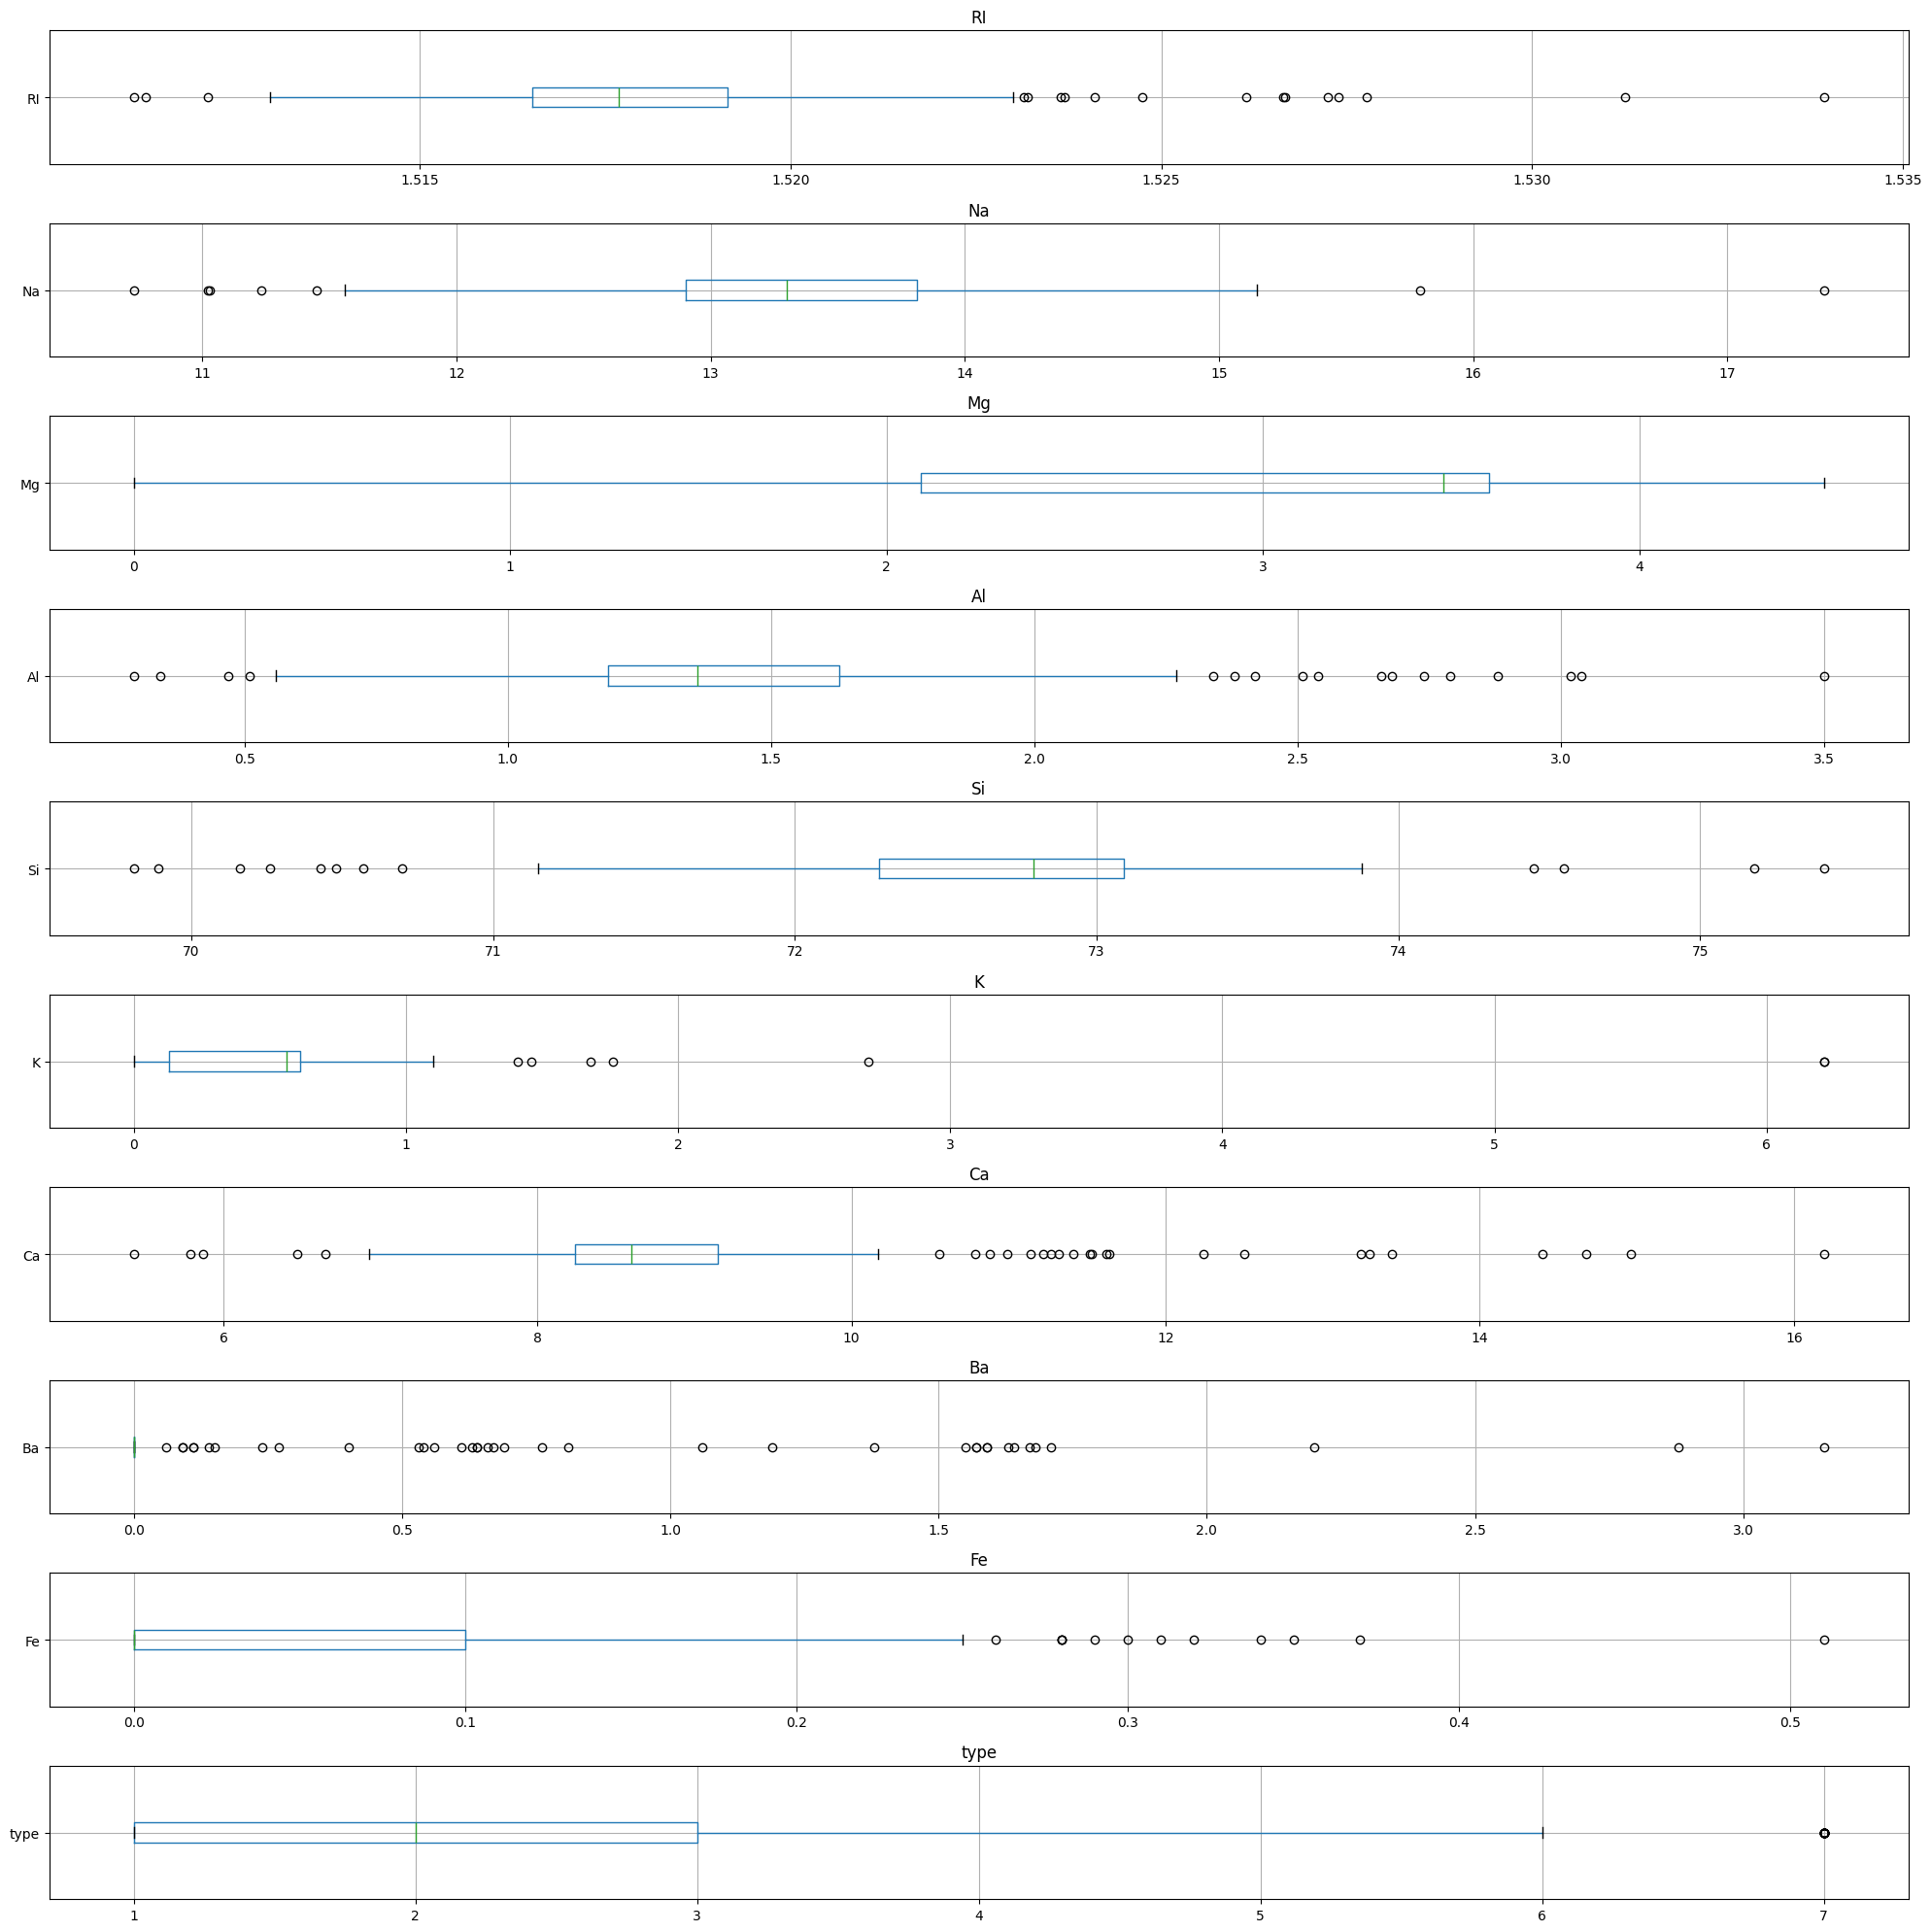

In [30]:
# mengecek keberadaan outlier

# Outliers
plt.figure(figsize=(20, 20))
numerical_columns = glass.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 1, i)
	glass.boxplot(column=column, vert=False)
	plt.title(column)
plt.tight_layout()
plt.show()

Pada boxplot di atas, terlihat bahwa jumlah outlier tidak terlalu banyak. Data juga cenderung normal, sehingga tidak perlu penanganan lebih lanjut terhadap outlier.

In [31]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [32]:
outliers = dict(check_outlier(glass).sum())

Outlier pada tiap atribut:
RI      17
Na       7
Mg       0
Al      17
Si      12
K        7
Ca      27
Ba      38
Fe      12
type    29
dtype: int64


Untuk kemudahan implementasi kita berasumsi bahwa *acceptance threshold* untuk outlier yang kita maklumi adalah 17 sehingga kita akan membuang kolom dengan jumlah outlier >= 17

In [33]:
drop_col = [key for key, val in outliers.items() if val >= 17]
drop_col.remove('type')
drop_col

['RI', 'Al', 'Ca', 'Ba']

In [34]:
glass = glass.drop(columns=drop_col)
glass.head()

,Na,Mg,Si,K,Fe,type
0,13.64,4.49,71.78,0.06,0.0,1
1,13.89,3.60,72.73,0.48,0.0,1
2,13.53,3.55,72.99,0.39,0.0,1
3,13.21,3.69,72.61,0.57,0.0,1
4,13.27,3.62,73.08,0.55,0.0,1


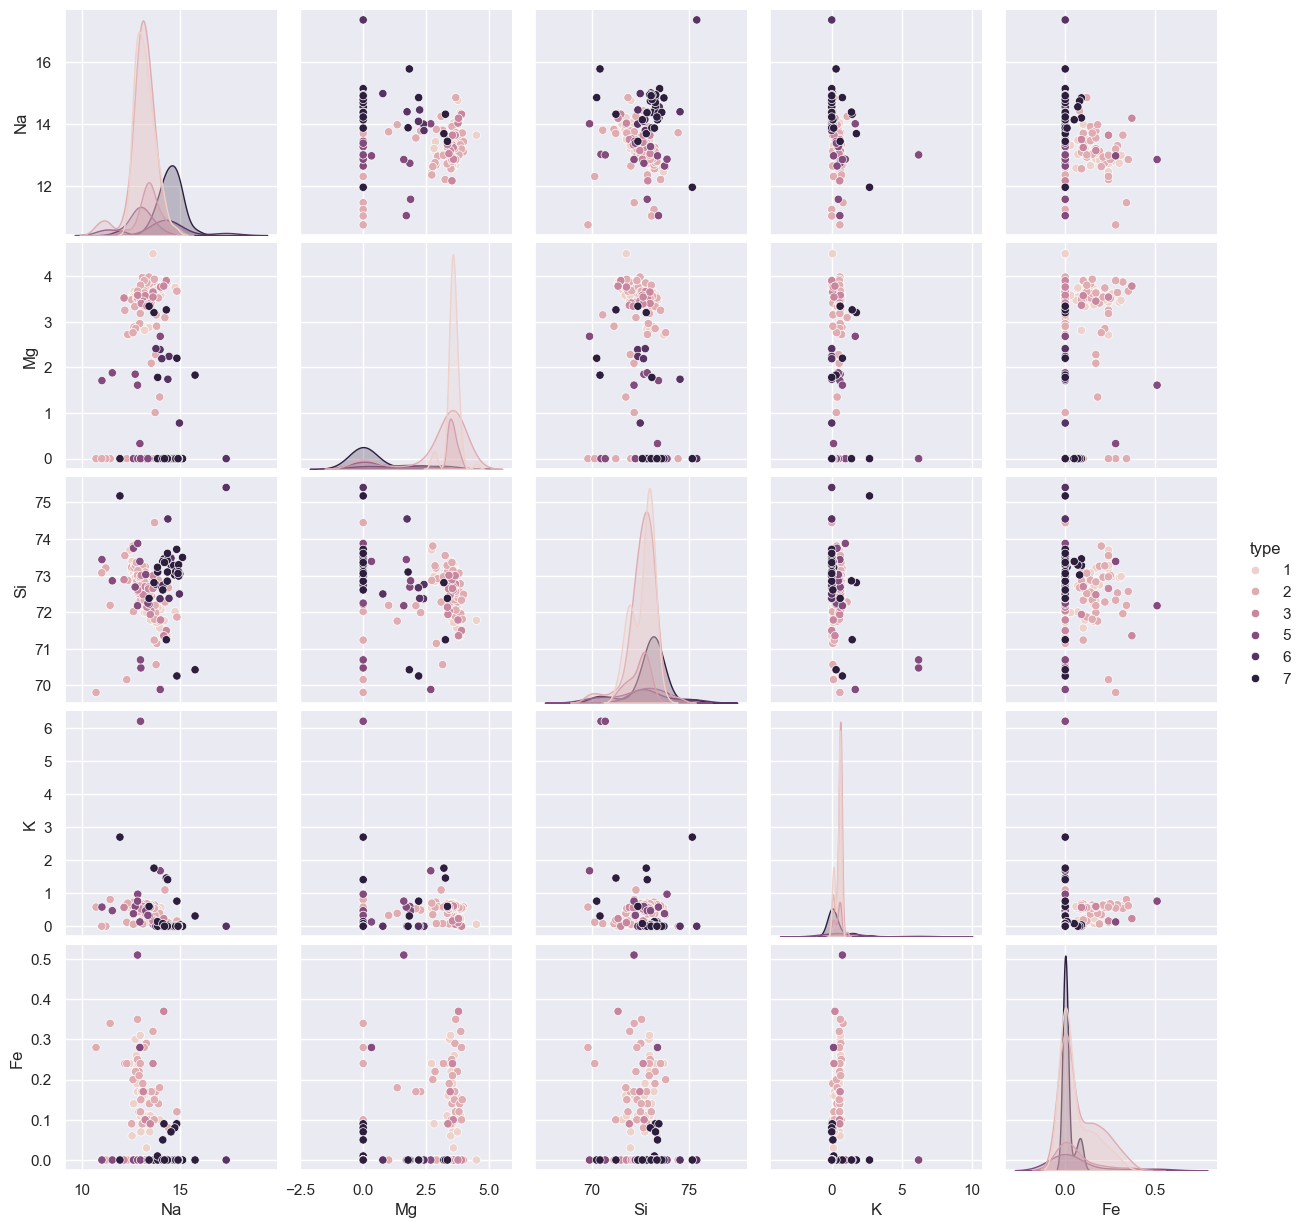

In [35]:
sns.set()
sns.pairplot(glass, hue ='type')
plt.show()

Berdasarkan plot diatas, terlihat bahwa distribusi nilai pada semua jenis obat hampir mendekati normal. Walaupun ada beberapa yang terlihat seperti bimodal, masih tetap bisa ditoleransi.

### Menentukan *Independent Variable* dan *Dependent Variable*

Dalam kasus ini, target prediksi kita adalah **type**, sehingga variabel **type** akan menjadi variabel dependen (target), sedangkan variabel lainnya akan menjadi variabel independen (fitur). Sebelum menentukan fitur yang akan digunakan dalam model, kita perlu melakukan ***feature selection*** untuk memilih variabel-variabel terbaik yang paling berpengaruh terhadap target.

> Dalam tahap ini, kita belum membahas secara mendalam mengenai feature selection atau feature engineering. Sementara itu, mahasiswa dapat mengikuti langkah-langkah yang diberikan pada lab

Karena data fitur kita bersifat numerik atau kontinu, dan data target kita kategorik, maka kita akan memilih strategi **ANOVA** atau *analysis of variance* dalam melakukan feature selection. Berikut adalah contohnya.

> Referensi: <br>
> https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [36]:
X_raw = glass.drop(["type"],axis=1)
y = glass["type"]

Kita akan memilih tiga variabel terbaik dari variabel independen (`X_raw`) untuk dilatih pada model. Berikut adalah contoh kodenya.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=3)
X = selector.fit_transform(X_raw, y)

*Note*: <br>
Perhatikan, pemilihan fitur harus dilakukan secara terus menerus atau berulang dengan memperbaiki tahap sebelumnya. Jika teman-teman ingin mendapatkan model terbaik, teman-teman harus terus melakukan tahapan ini hingga teman-teman mendapatkan model yang terbaik.

In [38]:
print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 5
Jumlah feature (setelah dilakukan feature selection ) : 3


In [39]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['Na', 'Mg', 'K'], dtype=object)

Dari hasil feature selection yang ada kita akan mengambil tiga fitur yaitu `Na`, `Mg`, dan `K`. Selanjutnya, kita akan melakukan *splitting data* yaitu membagi dataset menjadi *testing* dan *training* dengan ukuran yang sama seperti pada proses Naive Bayes. Berikut adalah caranya:

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

*Note*:<br>
`stratify=y` digunakan untuk memastikan proporsi kelas pada data training dan testing sama dengan dataset asli. Ini digunakan untuk dataset dengan distribusi kelas yang tidak seimbang (*imbalanced*).


Sebelum menerapkan algoritma KNN, penting untuk melakukan **standarisasi** atau **normalisasi** pada nilai-nilai independent variables (fitur). Hal ini sangat krusial karena KNN menggunakan perhitungan jarak (seperti Euclidean atau Manhattan) untuk menentukan tetangga terdekat. Jika fitur memiliki rentang nilai yang berbeda-beda, fitur dengan skala yang lebih besar akan mendominasi perhitungan jarak, sehingga mengganggu performa model.

Pada tahapan ini, kita akan memilih menggunakan normalisasi, berikut adalah caranya.

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### *Classification*

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Mengatur jumlah neighbor yang digunakan.
N_NEIGHBORS = 4

# Mengatur jumlah pelatihan pada fold fold yang ada.
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Anda dapat memilih rumus perhitungan jarak yang ingin digunakan dengan menambahkan parameter `metric` pada saat pembuatan model KNN. Secara *default*, jika tidak ditambahkan, nilai parameter tersebut adalah `minkowski`.

#### KNN dengan *Euclidian Distance*

In [43]:
KNN_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [44]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.5882352941176471


In [45]:
y_pred = KNN_euclidean.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 5 1 5 2 1 2 2 1 2 3 1 7 6 1 7 7 1 1 5 1 1 7 2 1 1 7 7 2 1 1 1 1 1 1 1 1
 2 1 1 1 2 6]


In [46]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.50      0.79      0.61        14
           2       0.62      0.33      0.43        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.71      0.83      0.77         6

    accuracy                           0.63        43
   macro avg       0.81      0.71      0.72        43
weighted avg       0.67      0.63      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,11,3,0,0,0,0
2,8,5,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,1,0,0,0,0,5



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.627906976744186
F1 Macro Average: 0.7191874148395887
F1 Micro Average: 0.627906976744186
Precision Macro Average: 0.8065476190476191
Precision Micro Average: 0.627906976744186
Recall Macro Average: 0.7142857142857143
Recall Micro Average: 0.627906976744186


#### KNN dengan *Manhattan Distance*

In [47]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [48]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.6294117647058824


In [49]:
y_pred = KNN_manhattan.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 5 1 5 2 1 1 2 1 1 3 1 7 6 1 7 7 1 1 5 1 1 7 2 1 1 7 7 2 1 7 1 1 1 1 1 1
 2 1 1 1 2 6]


In [50]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.52      0.86      0.65        14
           2       0.67      0.27      0.38        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.65        43
   macro avg       0.82      0.74      0.73        43
weighted avg       0.69      0.65      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,12,2,0,0,0,0
2,9,4,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,6



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6511627906976745
F1 Macro Average: 0.731123981123981
F1 Micro Average: 0.6511627906976745
Precision Macro Average: 0.8230676328502415
Precision Micro Average: 0.6511627906976745
Recall Macro Average: 0.7428571428571429
Recall Micro Average: 0.6511627906976745


#### KNN dengan *Jaccard Similarity*

In [51]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='jaccard', n_neighbors=4)

In [52]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.4294117647058823


In [53]:
y_pred = KNN_jaccard.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [7 2 1 2 1 1 1 1 1 1 1 1 2 6 1 2 7 1 1 2 1 1 7 1 1 1 2 7 1 1 1 1 1 1 1 1 1
 1 1 1 1 7 6]


In [54]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.47      1.00      0.64        14
           2       0.17      0.07      0.10        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00         2
           7       0.60      0.50      0.55         6

    accuracy                           0.47        43
   macro avg       0.37      0.43      0.38        43
weighted avg       0.34      0.47      0.36        43


Confusion Matrix:


prediction,1,2,6,7
actual,,,,
1,14,0,0,0
2,12,1,0,2
3,3,0,0,0
5,0,3,0,0
6,0,0,2,0
7,1,2,0,3



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.46511627906976744
F1 Macro Average: 0.3795093795093795
F1 Micro Average: 0.46511627906976744
Precision Macro Average: 0.37222222222222223
Precision Micro Average: 0.46511627906976744
Recall Macro Average: 0.42777777777777776
Recall Micro Average: 0.46511627906976744


Berdasarkan hasil evaluasi beberapa model di atas, terlihat bahwa model menghasilkan performa yang kurang optimal saat menggunakan metrik `Jaccard`. Hal ini terjadi karena metrik Jaccard umumnya digunakan untuk menghitung kesamaan (*similarity*) atau ketidaksamaan (*dissimilarity*) antara fitur-fitur yang bersifat biner atau kategorikal. Sementara itu, semua fitur dalam dataset kita sudah dalam bentuk numerik. Akibatnya, metrik Jaccard tidak cocok untuk menghitung jarak antara atribut-atribut numerik, sehingga berdampak pada kinerja model yang dihasilkan menjadi kurang baik.

### Hyperparameter Tuning

Seperti yang sudah dikatakan sebelumnya, dalam memilih nilai K yang terbaik kita perlu melakukan cross validation. Kita akan melakukan hal ini dengan hyperparameter tuning menggunakan bantuan grid search cv. Scoring yang akan kita gunakan pada fase tuning adalah accuracy, artinya adalah kita akan mengambil parameter terbaik yang memberikan nilai akurasi terbaik. Berikut adalah contohnya.

In [55]:
# Optimalisasi KNN dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# Parameter yang akan di-tuning
tunned_params = {
	'n_neighbors': list(range(1, 21)),
	'metric': ['euclidean', 'manhattan', 'jaccard']
}

In [56]:
print("Tuning hyperparameters model KNN\n")

clfKNN = GridSearchCV(
	model,
	tunned_params,
	scoring="accuracy",
	cv=kfold,
	verbose=2
)

# Melatih model dengan data training
clfKNN.fit(X_train_scaled, y_train)

Tuning hyperparameters model KNN

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=1; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=2; total time=   0.0s
[CV] END ....................metric=euclidean, n_neighbors=3; total time=   0.0s
[CV] END ....

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=2)

In [57]:
# Menampilkan parameter terbaik
print("\nBest parameters set found on development set:")
print(clfKNN.best_params_)


Best parameters set found on development set:
{'metric': 'manhattan', 'n_neighbors': 4}


In [58]:
# Evaluasi performa model dengan data testing
print("\nDetailed classification report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)


Detailed classification report:
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           1       0.52      0.86      0.65        14
           2       0.67      0.27      0.38        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.75      1.00      0.86         6

    accuracy                           0.65        43
   macro avg       0.82      0.74      0.73        43
weighted avg       0.69      0.65      0.61        43


Confusion Matrix:


prediction,1,2,3,5,6,7
actual,,,,,,
1,12,2,0,0,0,0
2,9,4,0,0,0,2
3,2,0,1,0,0,0
5,0,0,0,3,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,6



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6511627906976745
F1 Macro Average: 0.731123981123981
F1 Micro Average: 0.6511627906976745
Precision Macro Average: 0.8230676328502415
Precision Micro Average: 0.6511627906976745
Recall Macro Average: 0.7428571428571429
Recall Micro Average: 0.6511627906976745


Berdasarkan hasil di atas, kita memperoleh bahwa nilai k yang paling optimal adalah 4 dengan metric distance `Manhattan`.

Model ini mencapai akurasi lebih dari 60%, yang menunjukkan performa yang cukup baik. Selain itu, nilai F1 Micro dan Accuracy yang di atas 60% mengindikasikan bahwa model mampu mengurangi false positive dan false negative. Namun, masih ada ruang untuk perbaikan dalam meningkatkan kualitas prediksi.

# **Latihan Soal**
---

## <b>A. Latihan Implementasi</b>

Kita akan mencoba membuat model klasifikasi untuk kasus transaction fraud, berikut adalah penjelasan tiap atribut yang digunakan pada dataset ini. Dataset ini diambil dari [Kaggle](https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset) dengan modifikasi.

*Attribute Information*:
- `transaction_id`: Unique identifier for each transaction.
- `user_id`: Unique identifier for the user.
- `transaction_amount`: Amount of money involved in the transaction.
- `transaction_type`: Type of transaction (Online, In-Store, ATM, etc.).
- `account_balance`: User's current account balance before the transaction.
- `device_type`: Type of device used (Mobile, Desktop, etc.).
- `location`: Geographical location of the transaction.
- `merchant_category`: Type of merchant (Retail, Food, Travel, etc.).
- `ip_address_flag`: Whether the IP address was flagged as suspicious (0 or 1).
- `failed_transaction_count_7d`: Count of failed transactions in the past 7 days.
- `card_type`: Type of payment card used (Credit, Debit, Prepaid, etc.).
- `card_age`: Age of the card in months.
- `transaction_distance`: Distance between the user's usual location and transaction location.
- `authentication_method`: How the user authenticated (PIN, Biometric, etc.).
- `risk_score`: Fraud risk score computed for the transaction.
- `is_weekend`: Whether the transaction occurred on a weekend (0 or 1).
- `is_fraud`: Target variable (0 = Not Fraud, 1 = Fraud).

In [59]:
transaction = pd.read_csv("synthetic_fraud_dataset.csv")
# transaction = pd.read_csv("https://drive.google.com/uc?export=download&id=1qfoScqTMrbZh3iEKvJ0CM_kxNwOTnScP")
transaction.head()

,transaction_id,user_id,transaction_amount,transaction_type,account_balance,device_type,location,merchant_category,ip_address_flag,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,is_fraud
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,NaN,POS,NaN,Mobile,NaN,Electronics,0,4,NaN,140,NaN,NaN,NaN,1,1


### **Deskripsi Soal**

Target klasifikasi kita adalah atribut `fraud`. Atribut tersebut terdiri atas nilai 1 atau 0, yang menyatakan apakah suatu transaksi adalah penipuan atau bukan.

Berikut adalah alur atau tahapan yang harus teman-teman kerjakan. Semangat!

### <b>Nomor 1</b> - <i>Preprocessing</i> [15]
Lakukan *preprocessing* pada dataset `transaction` sebelum melanjutkan ke tahap berikutnya. Untuk setiap subsoal, tuliskan juga alasan mengapa penanganan tersebut dilakukan.

#### a. <i>Missing Values</i>
Jika ditemukan *missing values*, lakukan penanganan yang tepat sesuai dengan asumsi Anda. Berikan alasan untuk setiap kolom yang ingin di-handle.

In [60]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan

# referensi : tutorial lab 5 kasdad
# Memanfaatkan fungsi yang telah dibuat tutorial sebelumnya
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na * 100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")
    else:
        print(missing_data[missing_data['Total'] > 0])

In [61]:
cek_null(transaction)

                       Total  Percent
risk_score              1254    2.508
authentication_method   2561    5.122
transaction_distance    3254    6.508
card_type               3561    7.122
location                4754    9.508
account_balance         5061   10.122
transaction_amount      6062   12.124


Terdapat missing value sehingga dilakukan penanganan

In [62]:
# kolom yang punya nilai null
columns_with_null = transaction.columns[transaction.isnull().any()]

# cek tipe data
null_dtypes = transaction[columns_with_null].dtypes
print(null_dtypes)

transaction_amount       float64
account_balance          float64
location                  object
card_type                 object
transaction_distance     float64
authentication_method     object
risk_score               float64
dtype: object


#### Penanganan Null kolom numerik

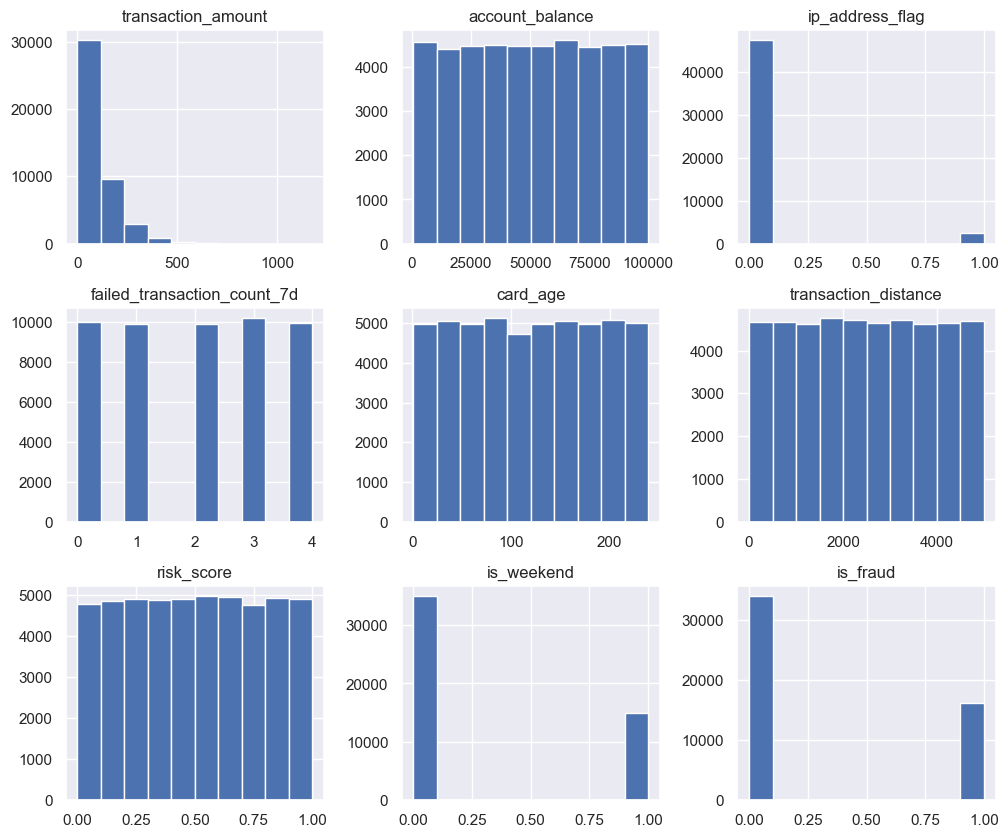

In [63]:
# melihat sebaran data tiap kolum
# referensi : tutorial lab 3 ksdd
transaction.hist(figsize=(12,10));

In [64]:
transaction.skew(numeric_only=True)

transaction_amount             2.010187
account_balance               -0.003406
ip_address_flag                4.119975
failed_transaction_count_7d   -0.008803
card_age                       0.000512
transaction_distance           0.005452
risk_score                    -0.000482
is_weekend                     0.874769
is_fraud                       0.765177
dtype: float64

In [65]:
for col in ['account_balance', 'transaction_distance', 'transaction_amount']:
    median_val = transaction[col].median()
    mean_val = transaction[col].mean()
    
    print(f"Median: {median_val}")
    print(f"Mean  : {mean_val}")

Median: 50424.4
Mean  : 50301.30907185296
Median: 2492.38
Mean  : 2499.937219441236
Median: 69.67500000000001
Mean  : 99.41907005325687


Kategori persentase missing value, referensi : chat gpt
- Rendah: 0-5% 
- Sedang: 5-20% 
- Tinggi: Lebih dari 20%

Maka akan dilakukan penanganan berikut : 

Untuk kolom risk_score karena persentase kurang dari 5% (2,5%) maka ia tergolong kategori rendah, maka akan dilakukan penanganan drop kolumn

Untuk kolum transaction_amount, account_balance, transaction_distance akan dilakukan imputasi median. Hal ini karena mereka tergolong kategori sedang dan median lebih robust terhadap outlier terutama untuk kolum transaction_amount yang sangat skewed. 

In [66]:
# imputasi median
transaction['transaction_amount'].fillna(transaction['transaction_amount'].median(), inplace=True)
transaction['account_balance'].fillna(transaction['account_balance'].median(), inplace=True)
transaction['transaction_distance'].fillna(transaction['transaction_distance'].median(), inplace=True)

# drop kolum
transaction.dropna(subset=['risk_score'], inplace=True)

/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_35296/926311041.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transaction['transaction_amount'].fillna(transaction['transaction_amount'].median(), inplace=True)
/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_35296/926311041.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interme

In [67]:
transaction.dtypes

transaction_id                  object
user_id                         object
transaction_amount             float64
transaction_type                object
account_balance                float64
device_type                     object
location                        object
merchant_category               object
ip_address_flag                  int64
failed_transaction_count_7d      int64
card_type                       object
card_age                         int64
transaction_distance           float64
authentication_method           object
risk_score                     float64
is_weekend                       int64
is_fraud                         int64
dtype: object

#### Penanganan Null kolom kategorikal

In [68]:
# referensi : tutorial lab kasdad 5
# Mencari jumlah nilai unik pada kolom yang bertipe kategorikal
for col in transaction.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(transaction[col].value_counts(), '\n')

No. of unique values in column transaction_id:
transaction_id
TXN_33553    1
TXN_36825    1
TXN_33326    1
TXN_43468    1
TXN_44752    1
            ..
TXN_16831    1
TXN_22570    1
TXN_36673    1
TXN_24307    1
TXN_15795    1
Name: count, Length: 48746, dtype: int64 

No. of unique values in column user_id:
user_id
USER_6599    16
USER_9998    15
USER_3415    15
USER_1027    15
USER_3925    15
             ..
USER_8277     1
USER_8049     1
USER_5685     1
USER_8133     1
USER_5580     1
Name: count, Length: 8957, dtype: int64 

No. of unique values in column transaction_type:
transaction_type
POS               12240
Online            12225
Bank Transfer     12152
ATM Withdrawal    12129
Name: count, dtype: int64 

No. of unique values in column device_type:
device_type
Tablet    16361
Mobile    16232
Laptop    16153
Name: count, dtype: int64 

No. of unique values in column location:
location
Tokyo       9231
Mumbai      9029
London      9004
Sydney      9003
New York    8979
Name: c

Ketiga kolom memiliki persentase null lebih dari 5%. Lalu karena semua kolom memiliki jumlah kategori yang terbatas (≤5 unique values), metode terbaik adalah modus imputation (mengisi dengan nilai yang paling sering muncul).

In [69]:
# imputasi modus
transaction['location'].fillna(transaction['location'].mode()[0], inplace=True)
transaction['card_type'].fillna(transaction['card_type'].mode()[0], inplace=True)
transaction['authentication_method'].fillna(transaction['authentication_method'].mode()[0], inplace=True)


/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_35296/1020376751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transaction['location'].fillna(transaction['location'].mode()[0], inplace=True)
/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_35296/1020376751.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [70]:
# mengecek kembali hasil penanganan
cek_null(transaction)

Tidak ditemukan missing value pada dataset


#### b. Nilai Duplikat
Jika ditemukan nilai duplikat, lakukan penanganan yang tepat sesuai dengan asumsi Anda.

In [71]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan

# referensi : tutorial lab kasdad 5
# mengecek jumlah duplikasi pada data
print("Jumlah duplikasi data: " + str(transaction.duplicated().sum()))

Jumlah duplikasi data: 0


Tidak ada data duplikat, tidak dilakukan penanganan lebih lanjut

#### c. <i>Outliers</i>
Jika ditemukan *outlier*, Anda bebas memilih penanganan *outlier* apa yang Anda gunakan. Dalam mencari *outlier* juga, Anda bebas menggunakan cara apapun, dengan tetap memberikan justifikasinya.

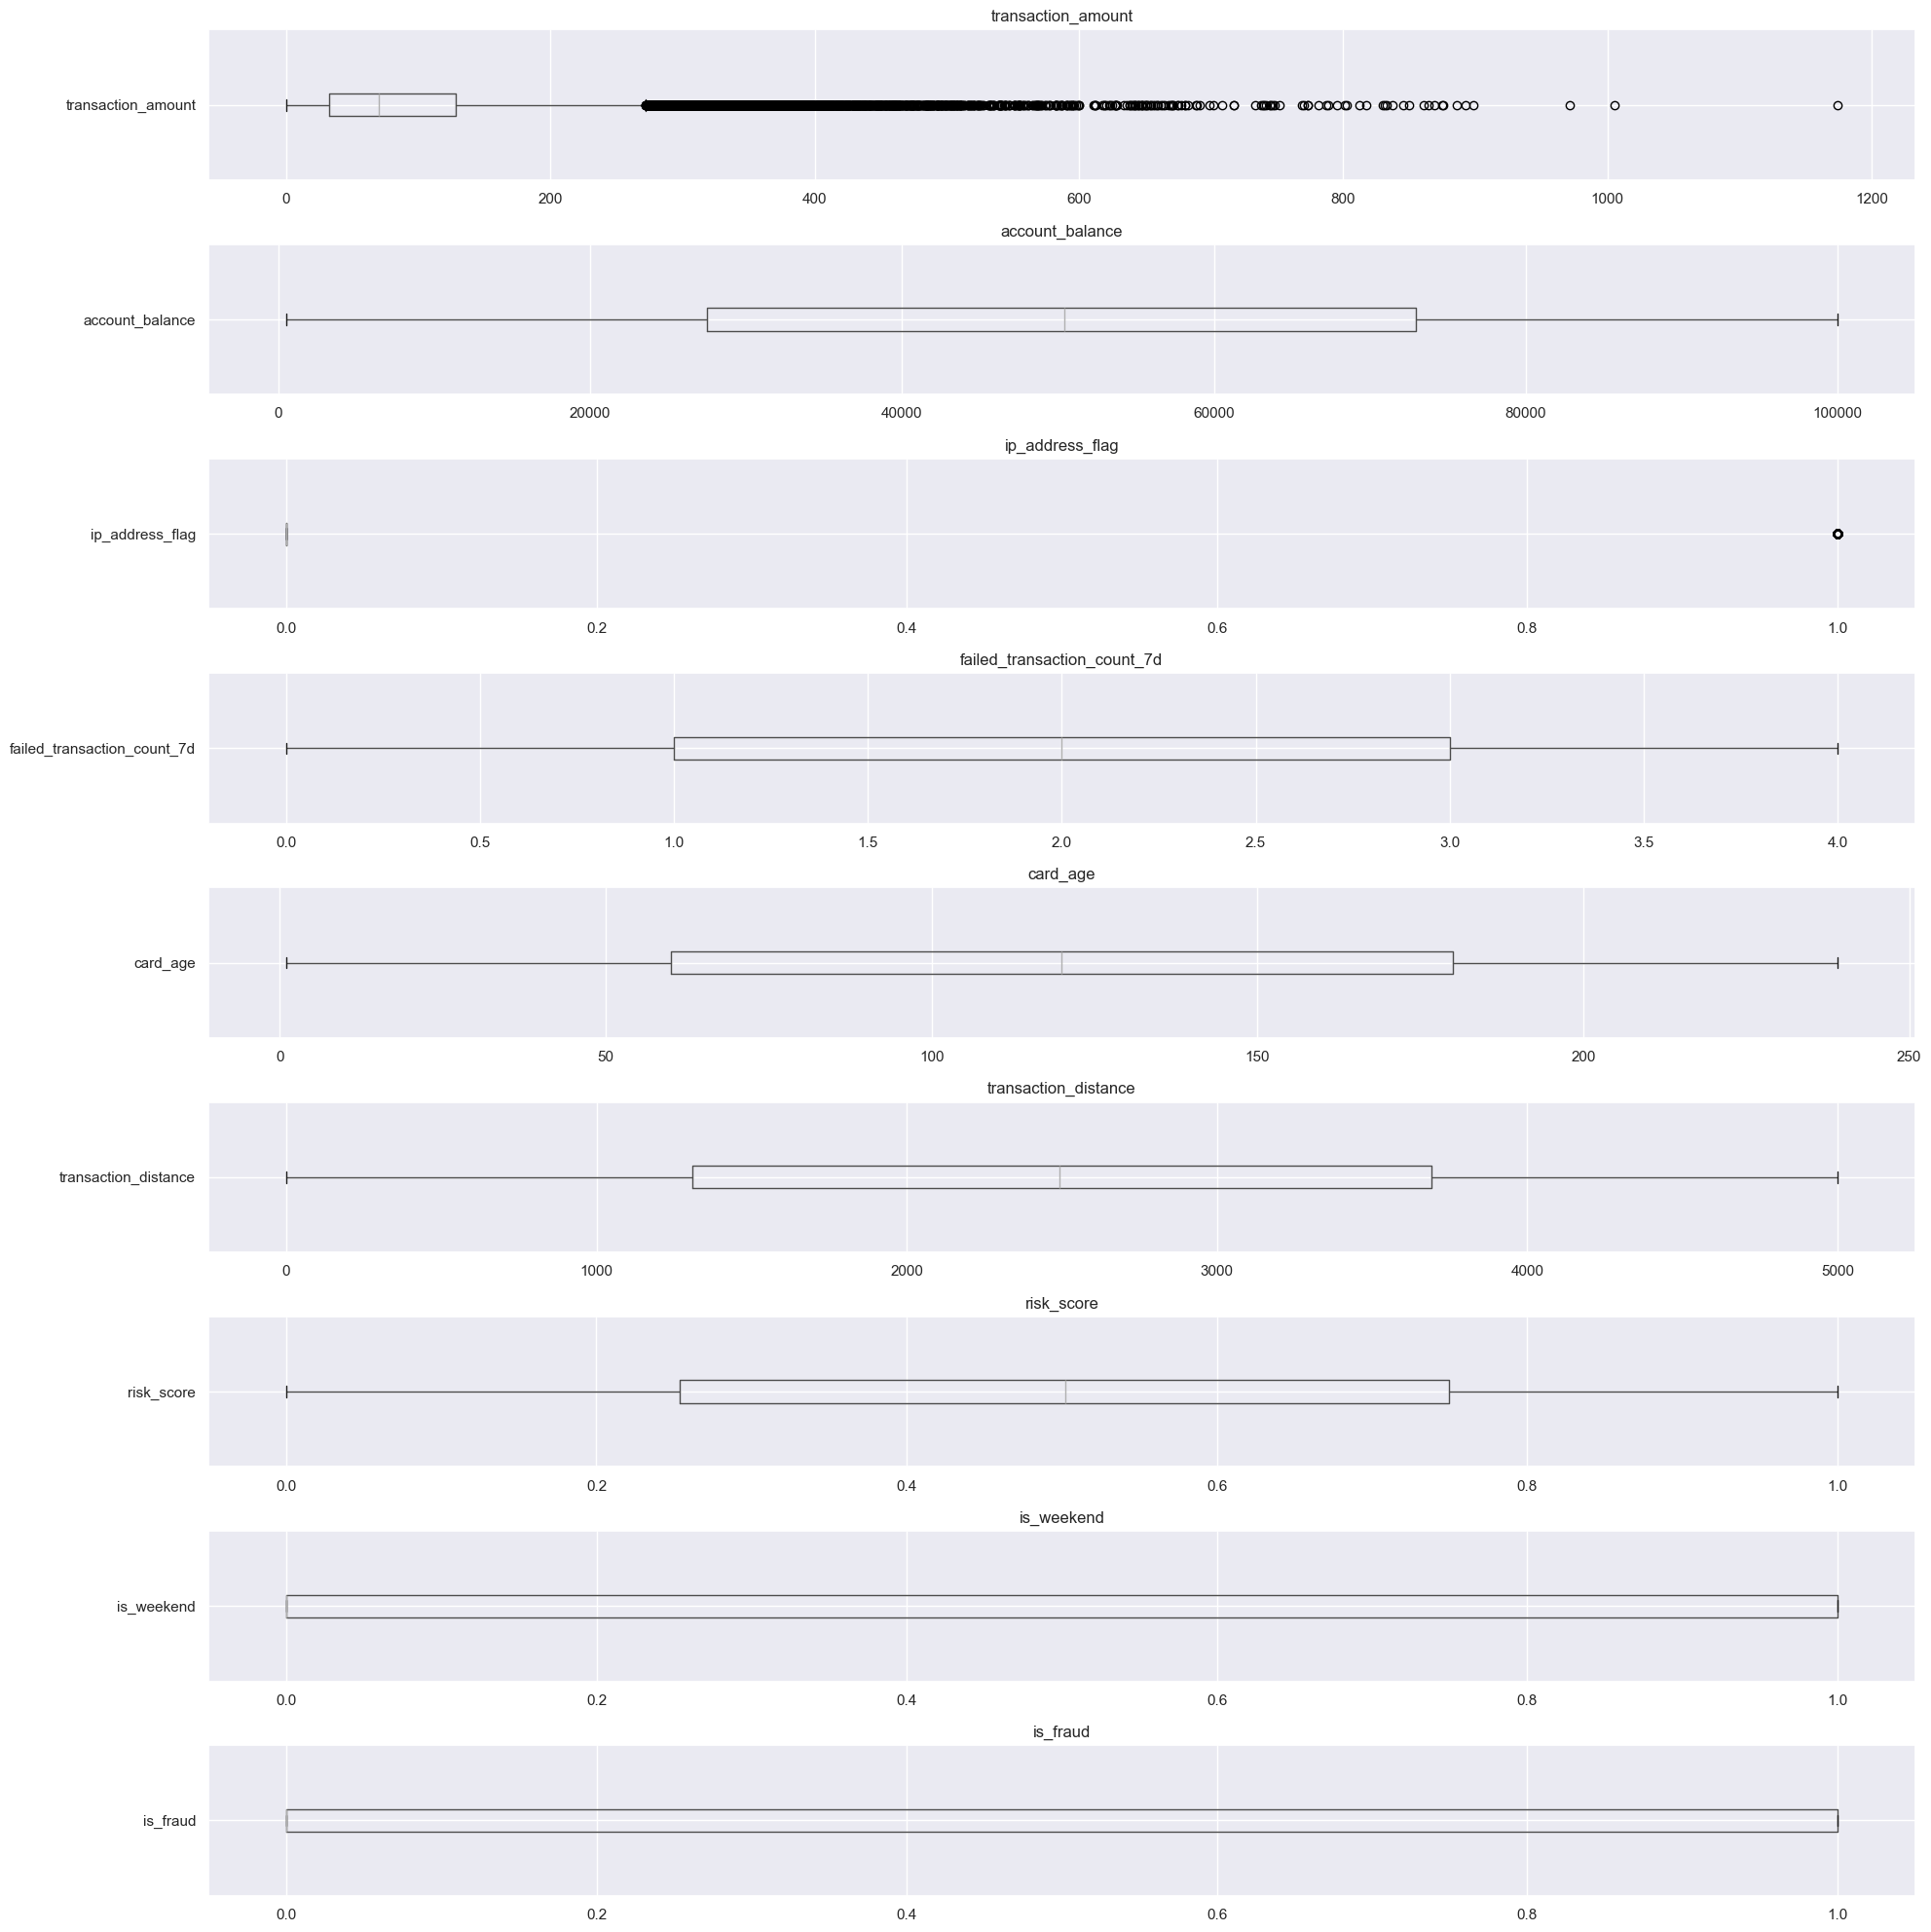

In [72]:
# referensi : tutorial lab kasdad 5

# buat boxplot untuk cek outlier
plt.figure(figsize=(20, 20))
numerical_columns = transaction.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 1, i)
	transaction.boxplot(column=column, vert=False)
	plt.title(column)
plt.tight_layout()
plt.show()

dari gambar terlihat kolum transaction ammount memiliki cukup banyak outlier. Sedangkan kolum lain tidak terdapat outlier dan cenderung normal

In [73]:
# referensi : tutorial lab kasdad 5

# cek outlier dengan iqr
def check_outlier(df):
    # pilih kolom numerik aja
    df_numeric = df.select_dtypes(include=['number'])

    # Menghitung kuartil
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan atas
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada tiap atribut
    outliers = (df_numeric < lower_limit) | (df_numeric > upper_limit)
    print("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

outliers = check_outlier(transaction)

Outlier pada tiap atribut:
transaction_amount             2779
account_balance                   0
ip_address_flag                2447
failed_transaction_count_7d       0
card_age                          0
transaction_distance              0
risk_score                        0
is_weekend                        0
is_fraud                          0
dtype: int64


note : ip_address_flag diatas bukan outlier,hal ini terjadi karena kolum merupakan nilai biner 0/1 bukan kontinu 

''

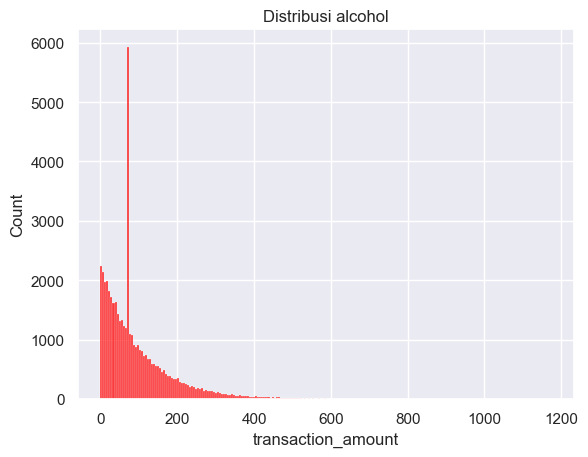

In [74]:
sns.histplot(data=transaction,x='transaction_amount', color='red')
plt.title('Distribusi alcohol')
;

In [75]:
transaction['transaction_amount'].describe()

count    48746.000000
mean        96.485301
std         94.089876
min          0.000000
25%         32.420000
50%         69.675000
75%        128.360000
max       1174.140000
Name: transaction_amount, dtype: float64

Dari informasi diatas dapat dilihat transaction_amount sangat skewed dengan nilai minimum dan maksimum yang sangat jauh. Walau memang transaction_amount (jumlah transaksi) dapat sangat bervariasi, namun mengingat salah satu model yang digunakan adalah KNN (sensitif terhadap outlier) . Maka saya akan melakukan penanganan lanjutan dengan mengganti nilai pakai lower bound dan upper bound


In [76]:
# referensi : latihan lab 3 kasdad 
columns_to_clip = ['transaction_amount']

for col in columns_to_clip:
    Q1 = transaction[col].quantile(0.25)
    Q3 = transaction[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    transaction[col] = transaction[col].clip(lower_bound, upper_bound)

In [77]:
# cek hasil kembali
outliers = check_outlier(transaction)

Outlier pada tiap atribut:
transaction_amount                0
account_balance                   0
ip_address_flag                2447
failed_transaction_count_7d       0
card_age                          0
transaction_distance              0
risk_score                        0
is_weekend                        0
is_fraud                          0
dtype: int64


#### d. Encoding Fitur Kategorikal

Encoding fitur yang masih berbentuk kategorikal dapat dilakukan dengan teknik apapun yang menurut Anda terbaik. Tuliskan untuk setiap fitur mengapa menggunakan encoding tersebut.

In [78]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan
for col in transaction.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(transaction[col].value_counts(), '\n')

No. of unique values in column transaction_id:
transaction_id
TXN_33553    1
TXN_36825    1
TXN_33326    1
TXN_43468    1
TXN_44752    1
            ..
TXN_16831    1
TXN_22570    1
TXN_36673    1
TXN_24307    1
TXN_15795    1
Name: count, Length: 48746, dtype: int64 

No. of unique values in column user_id:
user_id
USER_6599    16
USER_9998    15
USER_3415    15
USER_1027    15
USER_3925    15
             ..
USER_8277     1
USER_8049     1
USER_5685     1
USER_8133     1
USER_5580     1
Name: count, Length: 8957, dtype: int64 

No. of unique values in column transaction_type:
transaction_type
POS               12240
Online            12225
Bank Transfer     12152
ATM Withdrawal    12129
Name: count, dtype: int64 

No. of unique values in column device_type:
device_type
Tablet    16361
Mobile    16232
Laptop    16153
Name: count, dtype: int64 

No. of unique values in column location:
location
Tokyo       12731
Mumbai       9029
London       9004
Sydney       9003
New York     8979
Na

Untuk encoding saya akan melakukan one-hot encoding untuk penanganan. Hal ini karena fitur2 kategorikal yang ada termasuk kategori nominal (tidak ada urutan yang jelas) dan jumlah kategori tergolong sedikit (kardinalitas rendah). Fitur2 tersebut adalah transaction_type, device_type, location, merchant_category, card_type, authentication_method. 

Sedangkan untuk transaction_id dan user_id saya memutuskan untuk drop 2 kolum ini karena hanya berupa identifier dan memiliki jumlah nilai yang sangat banyak (mungkin memiliki pengaruh yang sedikit pada model)

In [79]:
# drop kolum
transaction.drop(['transaction_id', 'user_id'], axis=1, inplace=True)

In [80]:
# one-hot encoding
transaction = pd.get_dummies(transaction, columns=['transaction_type', 'device_type', 'merchant_category', 'card_type', 'authentication_method', 'location'], drop_first=True)

In [81]:
transaction.head()

,transaction_amount,account_balance,ip_address_flag,failed_transaction_count_7d,card_age,transaction_distance,risk_score,is_weekend,is_fraud,transaction_type_Bank Transfer,transaction_type_Online,transaction_type_POS,device_type_Mobile,device_type_Tablet,merchant_category_Electronics,merchant_category_Groceries,merchant_category_Restaurants,merchant_category_Travel,card_type_Discover,card_type_Mastercard,card_type_Visa,authentication_method_OTP,authentication_method_PIN,authentication_method_Password,location_Mumbai,location_New York,location_Sydney,location_Tokyo
0,39.79,93213.17,0,3,65,883.17,0.8494,0,0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,1.19,75725.25,0,4,186,2203.36,0.0959,0,1,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
2,28.96,1588.96,0,4,226,1909.29,0.8400,0,1,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False
3,254.32,76807.20,0,4,76,1311.86,0.7935,0,1,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False
5,168.55,33236.94,0,2,51,1725.64,0.0504,0,0,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True


> Anda boleh melakukan *preprocessing* lebih lanjut jika diperlukan, namun kriteria minimum yang wajib Anda lakukan adalah seperti subsoal di atas.

### <b>Nomor 2</b> - Persiapan Training [15]
Pada tahap ini, Anda diminta melakukan persiapan melakukan training. Berikut adalah hal-hal minimum yang harus Anda lakukan :

#### a. <i>Dependent</i> dan <i>Independent Variables</i>
Anda diminta untuk memilih variabel dependen `is_fraud` dan variabel independen yang terbaik menurut penemuan Anda. Anda dapat melakukan *feature selection* dengan ukuran terbaik menurut Anda. Jangan lupa untuk menjelaskan asumsi yang Anda ambil. <br>
(*Hint*: Silakan eksplorasi pengambilan fitur dari jumlah kecil ke jumlah besar)

Untuk metode feature selection, saya akan menggunakan ANOVA untuk fitur numerik dan chi-square untuk fitur biner dan fitur hasil encoding. Saya juga akan memulai dengan pengambilan kecil ke besar, dengan kecil k=3. 

Berikut detail k yang saya ambil : 

Urut dari kecil, sedang, besar

k_values = (3, 3), (4, 8), (5, 12)  (k numerik, k biner)

Setelah menguji ketiganya , saya dapatkan bahwa kombinasi terbaik adalah jumlah kecil yaitu (3,3). Oleh karena itu pada lab ini yang digunakan/ditampilkan adalah (3,3)

Untuk target/dependen variabel  adalah is_fraud sesuai deskripsi dataset dan yang ingin diprediksi

In [82]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan
# referensi : chatgpt, tutorial lab kasdad 5
numerical_features = ["transaction_amount", "account_balance", "transaction_distance", "risk_score", "card_age"]
binary_features = [
    "ip_address_flag", "failed_transaction_count_7d", "is_weekend", 
    "transaction_type_Bank Transfer", "transaction_type_Online", "transaction_type_POS",
    "device_type_Mobile", "device_type_Tablet",
    "merchant_category_Electronics", "merchant_category_Groceries", 
    "merchant_category_Restaurants", "merchant_category_Travel",
    "card_type_Discover", "card_type_Mastercard", "card_type_Visa",
    "authentication_method_OTP", "authentication_method_PIN", "authentication_method_Password",
    "location_Mumbai", "location_New York", "location_Sydney", "location_Tokyo"
]

X_numerical = transaction[numerical_features]
X_binary = transaction[binary_features]
y = transaction["is_fraud"]

In [83]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# ANOVA untuk fitur numerik
anova_selector = SelectKBest(f_classif, k=3)  # Ambil 3 fitur terbaik numerik
X_selected_numerical = anova_selector.fit_transform(X_numerical, y)

# Chi-Square untuk fitur biner
chi2_selector = SelectKBest(chi2, k=3)  # Ambil 3 fitur terbaik kategorikal
X_selected_binary = chi2_selector.fit_transform(X_binary, y)


In [84]:
selected_numerical_features = anova_selector.get_feature_names_out()
selected_binary_features = chi2_selector.get_feature_names_out()


# gabungkan nama fitur
selected_features = list(selected_numerical_features) + list(selected_binary_features)
X_selected_combined = np.hstack((X_selected_numerical, X_selected_binary))

# konversi ke DataFrame dengan nama kolom
X_selected_df = pd.DataFrame(X_selected_combined, columns=selected_features)

In [85]:
X_selected_df.head()

,account_balance,risk_score,card_age,failed_transaction_count_7d,device_type_Tablet,authentication_method_PIN
0,93213.17,0.8494,65.0,3.0,0.0,0.0
1,75725.25,0.0959,186.0,4.0,0.0,0.0
2,1588.96,0.8400,226.0,4.0,1.0,0.0
3,76807.20,0.7935,76.0,4.0,1.0,0.0
4,33236.94,0.0504,51.0,2.0,0.0,0.0


In [86]:
y.head()

0    0
1    1
2    1
3    1
5    0
Name: is_fraud, dtype: int64

#### b. <i>Splitting Dataset</i>

Anda diminta untuk membagi dataset menjadi *training* dan *testing* dengan ketentuan:
- Data training: 70%
- Data testing: 30%
- Random state: 2025
- Pembagian target merata di kedua data

In [87]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan
# train test split 70 training 30 testing, random state 2025, 
# stratify = y untuk mastiin proporsi
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.3, stratify=y, random_state=2025)

#### c. <i>Scaling</i>
Anda diminta untuk melakukan *scaling*. Anda dapat memilih teknik *scaling* apa yang menurut Anda merupakan strategi terbaik. Berikan alasan mengapa Anda menggunakan strategi tersebut. <br>
(<i>Hint</i>: Perhatikan metode yang digunakan saat *scaling*, jangan sampai keliru ketika melakukan *scaling* training dan testing).

Disini saya menggunakan MinMaxScaler (normalisasi) karena lebih bagus untuk data skew. 
Saya juga hanya melakukan scaling di fitur numerik tanpa fitur biner yang di encoding sebelumnya karena tidak perlu di scaling

In [88]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan
# referensi : tutorial lab kasdad 5, chat gpt

scaler = MinMaxScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# hanya menggunakan fitur numerik
X_train_scaled[selected_numerical_features] = scaler.fit_transform(X_train[selected_numerical_features])
X_test_scaled[selected_numerical_features] = scaler.transform(X_test[selected_numerical_features])


### <b>Nomor 3</b> - Proses Training [50]

#### <b>a. Implementasi Naive Bayes</b>

Pada tahapan ini, Anda diminta untuk membangun model klasifikasi Naive Bayes dengan memilih model Naive Bayes yang sesuai.

Berikut adalah tahapan umum yang dapat Anda ikuti:
1. **Membangun Model Naive Bayes**:
	- Pilih model Naive Bayes yang sesuai.
	- Berikan alasan mengapa model tersebut yang paling sesuai.
	- Lakukan *hyperparameter tuning* untuk memaksimalkan model Naive Bayes (opsional).

2. **Cross-Validation**:
	- Lakukan cross-validation menggunakan `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya..
	- Tampilkan rata-rata hasil evaluasi cross-validation.

3. **Evaluasi Model**:
	- Lakukan prediksi pada data test.
	- Lakukan evaluasi model dengan metrik yang sesuai.
	- Analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

***Tips***: <br>Ingat bahwa model kita ingin memprediksi apakah suatu transaksi adalah fraud atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Positive (serta False Negative). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

***Hint***: <br>
Lihat distribusi nilai dari setiap feature yang telah Anda pilih pada tahap sebelumnya, apakah sifat distribusinya? Melalui analisis ini, Anda bisa menentukan model apa yang optimal.


/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_35296/455696267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


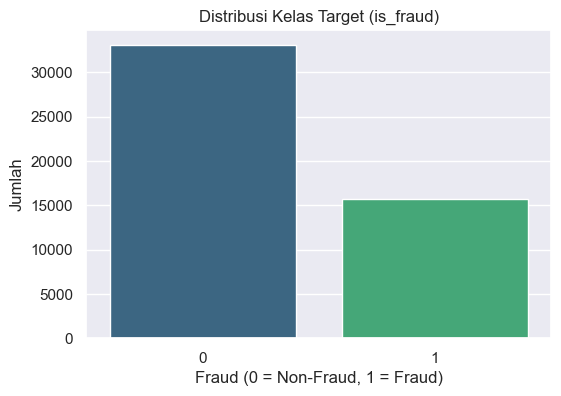

Proporsi Kelas Target:
 is_fraud
0    0.678702
1    0.321298
Name: proportion, dtype: float64


In [89]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan

# melihat distribusi nilai 
# distribusi target
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="viridis")
plt.title("Distribusi Kelas Target (is_fraud)")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Jumlah")
plt.show()

# Hitung proporsi
fraud_ratio = y.value_counts(normalize=True)
print("Proporsi Kelas Target:\n", fraud_ratio)

Dari distribusi target diatas, terlihat bahwa distibusi cukup seimbang. Walau didominasi oleh Non-Fraud, namun hal ini cukup umum

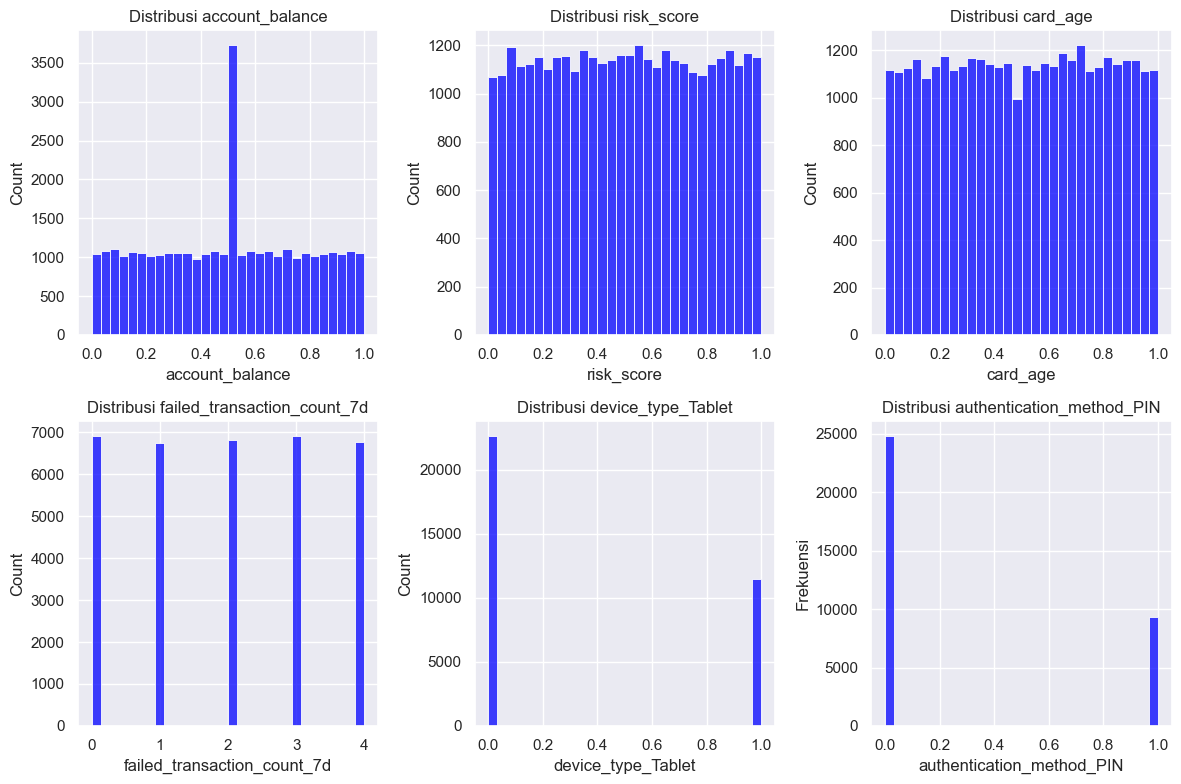

In [90]:
# distribusi fitur dari feature selection
selected_features = ["account_balance", "risk_score", "card_age", 
                     "failed_transaction_count_7d", "device_type_Tablet", "authentication_method_PIN"]

# Plot histogram untuk melihat distribusi fitur
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(X_train_scaled[feature], bins=30, color='blue')
    plt.title(f"Distribusi {feature}")
plt.xlabel(feature)
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()



Untuk fitur yang sudah dipilih terlihat ada distribusi yang terlihat mirip distribusi uniform, distribusi biner dan ada juga yang bernilai diskrit. 

Dalam pemilihan model naive bayes saya akan menggunakan 2 model yaitu GaussianNB dan BernoulliNB. Dalam pemilihan saya berfokus untuk tidak mencari model yang "benar" karena dalam dunia nyata hampir tidak mungkin menemukan model yang "benar" sehingga saya fokus mencari model yang akurat (referensi : https://stats.stackexchange.com/questions/215191/what-is-the-best-form-gaussian-multinomial-of-naive-bayes-to-use-with-categor )

Kedua model ini dipilih karena hasil distribusi fitur dan performa mereka yang baik secara umum. Dimana Gaussian dipilih karena ada fitur numerik kontinu dan ia masih bisa menangkap pola probabilitas meskipun distribusi tidak normal. Lalu bernoulli dipilih karena ada fitur biner.

In [91]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
# menentukan kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=2025)

In [ ]:
# inisiasi model dan hyperparamater tuning
# referensi : tutorial lab 5 kasdad
# GaussianNB 


model_gnb = GaussianNB()
scores_gnb = cross_val_score(model_gnb, X_train_scaled, y_train, cv=kfold)  # Ganti X_train → X_train_scaled
print("GaussianNB Cross-validation scores:", scores_gnb)
print("GaussianNB Mean accuracy:", np.mean(scores_gnb))

GaussianNB Cross-validation scores: [0.88908425 0.89406593 0.89976553 0.88921454 0.88672333]
GaussianNB Mean accuracy: 0.8917707165831432


In [94]:
# BernoulliNB
model_bnb = BernoulliNB()
scores_bnb = cross_val_score(model_bnb, X_train_scaled, y_train, cv=kfold)
print("BernoulliNB Cross-validation scores:", scores_bnb)
print("BernoulliNB Mean accuracy:", np.mean(scores_bnb))


BernoulliNB Cross-validation scores: [0.67384615 0.67750916 0.68053927 0.67467761 0.68684056]
BernoulliNB Mean accuracy: 0.6786825511338993


Dari hasil cross-validation, terlihat bahwa skor akurasi bervariasi di setiap fold, dengan rata-rata 0.877 untuk gaussian dan 0.679 untuk bernoulli. 

Pada tahap ini saya memutuskan untuk menggunakan Gaussian sebagai model naive bayes saya karena bernoulli sebenarnya umumnya untuk fitur biner saja

Selanjutnya, kita akan melatih model menggunakan data training dan melakukan prediksi pada data testing.

In [95]:
# masukin training ke naive bayes
model_gnb.fit(X_train_scaled, y_train)  
y_pred_gnb = model_gnb.predict(X_test_scaled)  

In [96]:
print("Hasil prediksi gaussian:", y_pred_gnb)

Hasil prediksi gaussian: [0 0 1 ... 0 1 0]


In [97]:
print("Actual:", np.array(y_test))

Actual: [0 0 0 ... 0 1 0]


In [98]:
# referensi : tutorial lab 5 kasdad
def evaluate_classifier_performance(prediction, y_test, model_name):
    print(f"\nHasil Evaluasi {model_name} berdasarkan classification report:\n")
    print(classification_report(y_test, prediction, zero_division=0))
    print()
    
    print("Confusion Matrix:")
    y_actual = pd.Series(np.array(y_test), name="actual")
    y_pred = pd.Series(np.array(prediction), name="prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    
    print(f"Butuh informasi lebih lengkap tentang {model_name}? Silakan simak di bawah ini:")
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro', zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro', zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro', zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro', zero_division=0))

In [99]:
evaluate_classifier_performance(y_pred_gnb, y_test, "GaussianNB")


Hasil Evaluasi GaussianNB berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9925
           1       0.85      0.81      0.83      4699

    accuracy                           0.89     14624
   macro avg       0.88      0.87      0.87     14624
weighted avg       0.89      0.89      0.89     14624


Confusion Matrix:


prediction,0,1
actual,,
0,9250,675
1,907,3792



Butuh informasi lebih lengkap tentang GaussianNB? Silakan simak di bawah ini:
Accuracy: 0.8918216630196937
F1 Macro Average: 0.8743143076293589
F1 Micro Average: 0.8918216630196937
Precision Macro Average: 0.8797969263357761
Precision Micro Average: 0.8918216630196937
Recall Macro Average: 0.8694850664941305
Recall Micro Average: 0.8918216630196937


### <b> Kesimpulan dan Pendekatan Lain</b>

Dari hasil analisis didapatkan GaussianNB memiliki mean accuracy 89.18% (lebih tinggi dibanding BernoulliNB).

Lalu kita ingin meminimalkan False Positive dan False Negative

Pada model GaussianNB, False Positive (FP) = 675 dan False Negative (FN) = 907. Artinya, GaussianNB cukup baik dalam menangani False Positive karena hanya sedikit transaksi sah yang ditandai sebagai fraud. Namun, False Negative (907 kasus) masih cukup tinggi, yang berarti masih ada transaksi fraud yang tidak terdeteksi.

Pada tahap ini seperti rekomendasi lab sebelumnya pendekatan yang lebih kompleks dalam menerapkan Naive Bayes adalah dengan memisahkan fitur numerik dan kategorik. Misal GaussianNB untuk fitur numerik dan BernoulliNB atau CategoricalNB yang lebih cocok untuk fitur biner/kategorikal. Selain itu bisa juga melakukan penanganan imbalance data lebih lanjut misal dengan SMOTE

Langkah selanjutnya yang dapat saya rekomendasikan adalah menggunakan model lain misal KNN.

#### <b>b. Implementasi KNN</b>

Setelah mencoba model Naive Bayes, Anda diminta juga untuk mencoba membangun model klasifikasi dengan algoritma KNN.

Berikut adalah tahapan umum yang dapat Anda ikuti:
1. **Pilih nilai K yang terbaik**:
	- Mulailah dengan memilih nilai K secara acak pada percobaan pertama.
	- Lakukan analisis berdasarkan hasil percobaan pertama.
	- Lakukan *hyperparameter tuning* untuk menemukan nilai K yang optimal.
	- Anda juga dapat mencoba teknik *hyperparameter tuning* lainnya yang tidak diajarkan pada lab ini (opsional).

2. **Cross-validation**:
	- Lakukan cross-validation menggunakan `KFold` atau `StratifiedKFold`, Anda dapat melakukan eksplorasi lebih lanjut untuk mengetahui perbedaan keduanya.
	- Tampilkan rata-rata hasil evaluasi cross-validation.
	- Bandingkan hasil evaluasi cross-validation untuk ketiga metrik (`euclidean`, `manhattan`, dan `jaccard`).

3. **Evaluasi model**:
	- Pilih parameter `metric` distance yang terbaik untuk memprediksi data *test*.
	- Berikan hasil evaluasi model dan analisis Anda.

***Tips***: <br>
Ingat bahwa model kita ingin memprediksi apakah suatu transaksi adalah fraud atau tidak. Oleh karena itu, usahakan pilih model dengan hasil evaluasi yang meminimalkan jumlah False Negative (serta False Positive). Selain itu, usahakan untuk mengaitkan analisis hasil evaluasi model Anda dengan metrik evaluasi tersebut.

In [100]:
# Anda dibebaskan untuk menambah blok kode dan blok markdown sesuai kebutuhan

# referensi : tutorial lab kasdad 5
# mengatur jumlah neighbor yang digunakan untuk percobaan pertama
N_NEIGHBORS = 5

# atur kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=2025)

#### KNN dengan *Euclidian Distance*

In [101]:
KNN_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
KNN_euclidean.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean')

In [102]:
scores = cross_val_score(KNN_euclidean, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross-validation (Euclidean): {scores.mean()}')

Hasil Evaluasi cross-validation (Euclidean): 0.9821522787489961


In [103]:
y_pred = KNN_euclidean.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [0 0 0 ... 0 1 0]


In [104]:
# inisiasi fungsi lab yang dibuat sebelumnya
def evaluate_classifier_performance(prediction, y_test):

    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report:\n")
    print(classification_report(y_test, prediction, zero_division=0))
    print()

    # Confusion Matrix
    print("Confusion Matrix:")
    y_actual = pd.Series(np.array(y_test), name="actual")
    y_pred = pd.Series(np.array(prediction), name="prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()

    # Informasi lengkap
    print("Butuh informasi lebih lengkap? Silakan simak di bawah ini:")
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro', zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro', zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro', zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro', zero_division=0))

evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9925
           1       0.97      0.98      0.97      4699

    accuracy                           0.98     14624
   macro avg       0.98      0.98      0.98     14624
weighted avg       0.98      0.98      0.98     14624


Confusion Matrix:


prediction,0,1
actual,,
0,9797,128
1,108,4591



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.9838621444201313
F1 Macro Average: 0.9815202206652062
F1 Micro Average: 0.9838621444201313
Precision Macro Average: 0.9809860125953926
Precision Micro Average: 0.9838621444201313
Recall Macro Average: 0.9820598305121997
Recall Micro Average: 0.9838621444201313


#### KNN dengan *Manhattan Distance*

In [105]:
KNN_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
KNN_manhattan.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan')

In [106]:
scores = cross_val_score(KNN_manhattan, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross-validation (Manhattan): {scores.mean()}')

Hasil Evaluasi cross-validation (Manhattan): 0.9839400564265744


In [107]:
y_pred = KNN_manhattan.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [0 0 0 ... 0 1 0]


In [108]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9925
           1       0.98      0.98      0.98      4699

    accuracy                           0.99     14624
   macro avg       0.98      0.98      0.98     14624
weighted avg       0.99      0.99      0.99     14624


Confusion Matrix:


prediction,0,1
actual,,
0,9810,115
1,98,4601



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.9854349015317286
F1 Macro Average: 0.9833184252609126
F1 Micro Average: 0.9854349015317286
Precision Macro Average: 0.9828619653655017
Precision Micro Average: 0.9854349015317286
Recall Macro Average: 0.983778798533157
Recall Micro Average: 0.9854349015317286


#### KNN dengan *Jaccard Similarity*

In [109]:
KNN_jaccard = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='jaccard')
KNN_jaccard.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='jaccard')

In [110]:
scores = cross_val_score(KNN_jaccard, X_train_scaled, y_train, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross-validation (Jaccard): {scores.mean()}')

Hasil Evaluasi cross-validation (Jaccard): 0.6679857044089166


In [111]:
y_pred = KNN_jaccard.predict(X_test_scaled)
print("Hasil prediksi:", y_pred)

Hasil prediksi: [0 0 0 ... 0 0 0]


In [112]:
evaluate_classifier_performance(y_pred, y_test)

Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.67      0.96      0.79      9925
           1       0.14      0.01      0.03      4699

    accuracy                           0.65     14624
   macro avg       0.40      0.49      0.41     14624
weighted avg       0.50      0.65      0.54     14624


Confusion Matrix:


prediction,0,1
actual,,
0,9485,440
1,4630,69



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.6533096280087527
F1 Macro Average: 0.40779959667834714
F1 Micro Average: 0.6533096280087527
Precision Macro Average: 0.4037700421808788
Precision Micro Average: 0.6533096280087527
Recall Macro Average: 0.48517574080556286
Recall Micro Average: 0.6533096280087527


Berdasarkan hasil percobaan pertama (k=5) menggunakan tiga metrik jarak berbeda pada model KNN untuk deteksi fraud, terlihat perbedaan performa di antara ketiganya. 

Manhattan distance menunjukkan hasil terbaik untuk kasus ini, diikuti oleh Euclidean distance dengan performa yang hampir setara. Sementara itu, Jaccard distance menunjukkan performa yang jauh lebih rendah karena karakteristiknya yang lebih cocok untuk data biner atau kategorikal, sedangkan dataset fraud detection ini didominasi oleh fitur numerik. Jaccard hanya mempertimbangkan kesamaan himpunan tanpa memperhitungkan besaran perbedaan nilai, sehingga kurang mampu membedakan pola fraud dengan baik. 

### Hyperparameter Tuning

In [113]:
model = KNeighborsClassifier()

# Parameter yang akan di-tuning
tuned_params = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan', 'jaccard'],
    'weights': ['uniform', 'distance']
}

In [114]:
print("\nTuning hyperparameters model KNN...")

clfKNN = GridSearchCV(
    model,
    tuned_params,
    scoring="accuracy",
    cv=kfold,
    verbose=2
)

# Melatih model dengan data training
clfKNN.fit(X_train_scaled, y_train)


Tuning hyperparameters model KNN...
Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=1, weights=uniform; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ..metric=euclidean, n_neighbors=1, weights=distance; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=2, weights=uniform; total time=   0.1s
[CV] END 

GridSearchCV(cv=KFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'jaccard'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [115]:
print("\nBest parameters set found on development set:")
print(clfKNN.best_params_)


Best parameters set found on development set:
{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


In [116]:
# Evaluasi performa model dengan data testing
print("\nDetailed classification report:")
y_true, y_pred = y_test, clfKNN.predict(X_test_scaled)
evaluate_classifier_performance(y_pred, y_true)


Detailed classification report:
Hasil Evaluasi berdasarkan classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9925
           1       0.99      0.98      0.98      4699

    accuracy                           0.99     14624
   macro avg       0.99      0.99      0.99     14624
weighted avg       0.99      0.99      0.99     14624


Confusion Matrix:


prediction,0,1
actual,,
0,9855,70
1,78,4621



Butuh informasi lebih lengkap? Silakan simak di bawah ini:
Accuracy: 0.9898796498905909
F1 Macro Average: 0.9883928179746058
F1 Micro Average: 0.9898796498905909
Precision Macro Average: 0.988612598032913
Precision Micro Average: 0.9898796498905909
Recall Macro Average: 0.9881739134163815
Recall Micro Average: 0.9898796498905909


Berdasarkan hasil evaluasi dan pemilihan parameter , model terbaik adalah metrik Manhattan, K (n_neighbors) sebanyak 20, dan bobot distance. Model ini mencapai akurasi sebesar 98.99%, dengan F1 Macro Average sebesar 98.84% dan Recall Macro Average sebesar 98.82%. Hasil ini menunjukkan bahwa model mampu menangani klasifikasi dengan baik, dengan tingkat kesalahan yang sangat rendah.  

Dari confusion matrix, terlihat bahwa model hanya menghasilkan 70 false positive dan 78 false negative dari total 14.624 sampel data uji. Nilai recall yang tinggi menunjukkan bahwa model dapat mengidentifikasi transaksi fraud dengan baik, yang sangat penting dalam konteks ini karena false negative (transaksi fraud yang tidak terdeteksi) harus diminimalkan. Jika dibandingkan dengan metrik lainnya, metrik Jaccard memberikan hasil yang jauh lebih rendah, menunjukkan bahwa metrik tersebut tidak cocok digunakan pada dataset ini. Oleh karena itu, model KNN dengan metrik Manhattan dipilih sebagai model terbaik untuk digunakan dalam prediksi data test.

## <b>B. Latihan Teoritis</b>

### <b>Nomor 1</b> - Naive Bayes [4]

Bagaimana cara menangani data dengan fitur campuran (numerik dan kategorikal) dalam implementasi Naive Bayes? Sebagai contoh, pada Hands-on Naive Bayes sebelumnya, kita menghapus kolom `Age` karena menggunakan Categorical Naïve Bayes. Jika kita ingin tetap menyertakan `Age` dalam pemrosesan, metode apa yang dapat digunakan untuk menangani fitur numerik dan kategorikal secara bersamaan?

**Jawaban**

Metode yang dapat digunakan adalah dengan memisahkan fitur numerik dan kategorikal, lalu melatih dua model Naïve Bayes yang berbeda sesuai dengan jenis datanya. Gaussian Naïve Bayes dapat digunakan untuk fitur numerik seperti Age, sementara Categorical Naïve Bayes digunakan untuk fitur kategorikal lainnya. Setelah kedua model dilatih secara terpisah, hasil prediksi probabilitasnya dapat digabungkan dengan mengalikan nilai probabilitas dari masing-masing model, dengan asumsi bahwa fitur-fitur tersebut bersifat independen. Strategi ini memungkinkan pemrosesan data yang lebih sesuai dengan karakteristiknya masing-masing sehingga dapat meningkatkan akurasi model. 

Selain itu, alternatif lain yang dapat digunakan adalah dengan melakukan transformasi menggunakan ColumnTransformer untuk menangani fitur numerik dan kategorikal dalam satu pipeline sebelum memasukkannya ke dalam model Gaussian Naïve Bayes. Fitur numerik seperti Age dapat dinormalisasi misal menggunakan StandardScaler, sedangkan fitur kategorikal dapat dikonversi dengan Encoder. Pendekatan lainnya adalah dengan mendiskretisasi fitur numerik seperti Age menggunakan metode binning, mengubahnya menjadi kategori seperti "Muda", "Dewasa", dan "Lansia", sehingga tetap memungkinkan penggunaan Categorical Naïve Bayes tanpa perlu memisahkan model. 

Referensi : 
- https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea
- https://medium.com/analytics-vidhya/naive-bayes-for-mixed-typed-data-in-scikit-learn-fb6843e241f0
- chat gpt

### <b>Nomor 2</b> - Naive Bayes [4]

Walaupun Naive Bayes adalah salah satu algoritma yang sederhana dan cepat untuk klasifikasi, namun algoritma ini memiliki beberapa kelemahan. Salah satu kelemahan utamanya adalah ***Zero Frequency Problem***.

Jawablah pertanyaan-pertanyaan di bawah ini dengan menggunakan markdown dan sertakan referensi yang Anda gunakan.

#### a. Apa yang dimaksud dengan <i>Zero Frequency Problem</i> dalam Naive Bayes?

**Jawaban**

Zero Frequency Problem dalam Naïve Bayes terjadi ketika suatu nilai fitur dalam data testing tidak pernah muncul di data training, sehingga probabilitasnya menjadi nol. Dikarenakan Naïve Bayes menghitung probabilitas dengan mengalikan semua kemungkinan fitur. Adanya probabilitas nol pada salah satu fitur akan menyebabkan seluruh perhitungan probabilitas kelas menjadi nol. Hal ini dapat menyebabkan model gagal melakukan prediksi dengan benar, terutama jika dataset yang digunakan memiliki distribusi data yang tidak merata atau terdapat fitur dengan nilai kategori yang jarang muncul.

referensi : 
- https://www.atoti.io/articles/how-to-solve-the-zero-frequency-problem-in-naive-bayes/
- https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html
- chat gpt

#### b. Bagaimana cara untuk mengatasi masalah tersebut?

**Jawaban**

Masalah Zero Frequency Problem dapat diatasi dengan teknik smoothing, yang paling umum digunakan adalah Laplace Smoothing (atau Additive Smoothing). Teknik ini bekerja dengan menambahkan nilai kecil ke semua kemungkinan kategori dalam distribusi probabilitas, sehingga tidak ada kategori yang memiliki probabilitas nol. Alternatif lain adalah memperbesar ukuran dataset agar kemungkinan munculnya semua kategori meningkat atau menerapkan teknik feature engineering untuk menyederhanakan kategori yang jarang muncul. Selain itu, memilih varian Naïve Bayes yang lebih fleksibel, seperti Multinomial atau Gaussian Naïve Bayes, dapat membantu mengatasi masalah ini tergantung pada jenis fitur yang digunakan.

referensi : 
- https://www.atoti.io/articles/how-to-solve-the-zero-frequency-problem-in-naive-bayes/
- https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html
- chat gpt

### <b>Nomor 3</b> - KNN [4]

K-Nearest Neighbors (KNN) adalah algoritma yang sederhana dan intuitif untuk klasifikasi dan regresi. Namun, algoritma ini memiliki beberapa kelemahan, salah satunya adalah ***Curse of Dimensionality***.

Jawablah pertanyaan-pertanyaan di bawah ini dengan menggunakan markdown dan sertakan referensi yang Anda gunakan.

#### a. Apa yang dimaksud dengan <i>Curse of Dimensionality</i>?

**Jawaban**

Curse of Dimensionality adalah fenomena di mana kinerja algoritma berbasis jarak, seperti K-Nearest Neighbors (KNN), menurun ketika jumlah fitur (dimensi) dalam dataset meningkat. Dalam ruang berdimensi tinggi, data menjadi lebih tersebar dan jarak antara titik-titik data semakin seragam, sehingga sulit bagi algoritma untuk membedakan antara titik data yang dekat dan yang jauh. Hal ini menyebabkan KNN kehilangan efektivitasnya karena kedekatan berbasis jarak Euclidean atau metrik lainnya tidak lagi mencerminkan hubungan yang bermakna antara data. Selain itu, peningkatan dimensi juga memperbesar kebutuhan komputasi karena jumlah perhitungan jarak bertambah secara eksponensial.

referensi : 
- https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d/
- https://www.baeldung.com/cs/k-nearest-neighbors
- https://www.geeksforgeeks.org/k-nearest-neighbors-and-curse-of-dimensionality/
- chat gpt

#### b. Bagaimana cara untuk mengatasi masalah tersebut?

**Jawaban**

Salah satu cara utama untuk mengatasi Curse of Dimensionality adalah dengan menerapkan teknik dimensionality reduction, seperti Principal Component Analysis (PCA) atau Linear Discriminant Analysis (LDA), yang dapat mengurangi jumlah fitur sambil tetap mempertahankan informasi penting. Selain itu, metode seleksi fitur (feature selection), seperti mutual information atau recursive feature elimination (RFE), dapat membantu menghilangkan fitur yang tidak relevan atau redundant. Alternatif lain adalah menggunakan metrik jarak yang lebih sesuai dengan data berdimensi tinggi, seperti cosine similarity, yang lebih efektif dalam menangani distribusi data yang menyebar di banyak dimensi.

referensi : 
- https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d/
- https://www.baeldung.com/cs/k-nearest-neighbors
- https://www.geeksforgeeks.org/k-nearest-neighbors-and-curse-of-dimensionality/
- chat gpt

### <b>Nomor 4</b> - Naive Bayes & KNN [3]
Bandingkan *computation time* antara model Naive Bayes dan KNN berdasarkan implementasi yang telah kalian lakukan sebelumnya. Jelaskan *insight* yang kalian peroleh dari hasil perbandingan tersebut. Mengapa hal tersebut tersebut bisa terjadi?

**Jawaban**

Berdasarkan hasil implementasi antara model Naive Bayes dan KNN, Naive Bayes memiliki waktu eksekusi yang jauh lebih cepat dibandingkan KNN, terutama dalam proses prediksi. Hal ini terjadi karena Naive Bayes hanya memerlukan perhitungan statistik sederhana, seperti estimasi probabilitas berdasarkan distribusi fitur, sehingga proses pelatihannya pun sangat efisien. Sebaliknya, KNN bekerja dengan pendekatan berbasis instance (instance-based learning), di mana prediksi dilakukan dengan menghitung jarak antara sampel uji dan seluruh sampel latih, sehingga semakin besar dataset, semakin lambat proses prediksinya. Oleh karena itu, Naive Bayes lebih cocok untuk dataset besar yang membutuhkan prediksi cepat, sementara KNN lebih sesuai untuk dataset kecil hingga sedang, terutama jika distribusi data memungkinkan pendekatan berbasis jarak untuk menghasilkan klasifikasi yang lebih akurat.

referensi : 
- https://www.datasciencecentral.com/comparing-classifiers-decision-trees-knn-naive-bayes/#:~:text=Naive%20Bayes%20is%20a%20linear,Naive%20Bayes%20over%20K%2DNN.
- https://pm-ha.medium.com/comparison-of-algorithms-knn-vs-naive-bayes-48a1841e6907
- chat gpt

## <b>C. Kaggle Competition!</b>

Dalam rangka menerapkan pemahaman kalian pada materi Naive Bayes dan KNN, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 5 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Model yang boleh digunakan hanya Naive Bayes atau K-Nearest Neighbor (KNN).
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**
- [Kaggle Competition - LAB 5 Naive Bayes & KNN](https://www.kaggle.com/t/45a48684325c47f89b14a87b983851d7)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 5 ini, kalian **diwajibkan** untuk mengikuti kompetisi Kaggle di atas.

### Kaggle Competition

#### EDA

In [119]:
# Lakukan EDA
df_air_train = pd.read_csv('air_quality_train.csv') 

df_air_train.head()

,date,station,pm10,pm25,so2,co,o3,no2,max,critical,category
0,2010-12-17,DKI1 (Bunderan HI),38.0,NaN,20.0,20.0,36.0,9.0,38.0,PM10,BAIK
1,2012-02-07,DKI4 (Lubang Buaya),55.0,NaN,22.0,34.0,72.0,17.0,72.0,O3,SEDANG
2,2013-08-07,DKI5 (Kebon Jeruk),61.0,NaN,15.0,22.0,86.0,17.0,86.0,O3,SEDANG
3,2018-03-06,DKI3 (Jagakarsa),64.0,NaN,28.0,30.0,103.0,16.0,103.0,O3,TIDAK SEHAT
4,2013-11-12,DKI5 (Kebon Jeruk),76.0,NaN,40.0,42.0,87.0,23.0,87.0,O3,SEDANG


In [120]:
df_air_test = pd.read_csv('air_quality_test.csv')

df_air_test.head()

,date,station,pm10,pm25,so2,co,o3,no2,max,critical
0,2012-05-19,DKI4 (Lubang Buaya),89.0,NaN,23.0,32.0,146.0,20.0,146.0,O3
1,2013-04-18,DKI1 (Bunderan HI),49.0,NaN,8.0,31.0,121.0,22.0,121.0,O3
2,2010-07-07,DKI1 (Bunderan HI),63.0,NaN,19.0,37.0,37.0,20.0,63.0,PM10
3,2013-03-06,DKI1 (Bunderan HI),103.0,NaN,17.0,80.0,99.0,35.0,103.0,PM10
4,2014-09-08,DKI5 (Kebon Jeruk),77.0,NaN,16.0,27.0,80.0,21.0,80.0,O3


In [118]:
df_air.dtypes

date         object
station      object
pm10        float64
pm25        float64
so2         float64
co          float64
o3          float64
no2         float64
max         float64
critical     object
category     object
dtype: object

In [121]:
df_air_train.describe()

,pm10,pm25,so2,co,o3,no2,max
count,3124.000000,518.000000,3226.000000,3233.000000,3233.000000,3231.000000,3238.000000
mean,65.063700,94.613900,28.116553,30.149397,86.325394,17.996905,99.228227
std,19.254804,27.234165,13.744830,13.605847,50.133978,8.088672,43.185844
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,77.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,90.000000
75%,75.000000,110.750000,34.000000,37.000000,109.000000,21.000000,118.000000
max,179.000000,287.000000,112.000000,134.000000,297.000000,93.000000,297.000000


Text(0.5, 1.0, 'Korelasi Antar Fitur Numerik')

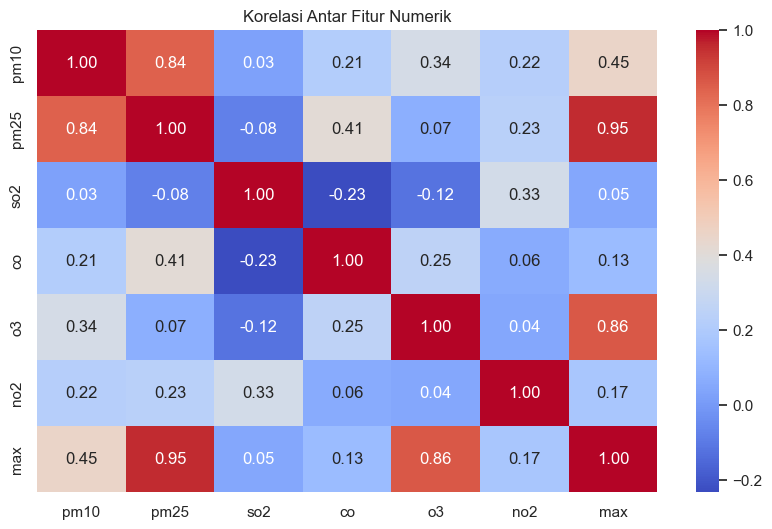

In [123]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_air_train.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")

#### Preprocessing

In [126]:
# Lakukan Preprocessing
cek_null(df_air_train)

          Total    Percent
critical      1   0.030883
co            5   0.154416
o3            5   0.154416
no2           7   0.216183
so2          12   0.370599
pm10        114   3.520692
pm25       2720  84.002471


In [127]:
cek_null(df_air_test)

      Total    Percent
no2       1   0.072046
co        3   0.216138
so2       7   0.504323
pm10     46   3.314121
pm25   1183  85.230548


In [128]:
# drop fitur 'pm25' karena terlalu banyak missing values
df_air_train.drop(columns=['pm25'], inplace=True)
df_air_test.drop(columns=['pm25'], inplace=True)

# imputasi median untuk fitur numerik lainnya
numerical_features = ['co', 'o3', 'no2', 'so2', 'pm10']
for col in numerical_features:
    median_value = df_air_train[col].median()  # Ambil median dari train
    df_air_train[col].fillna(median_value, inplace=True)
    df_air_test[col].fillna(median_value, inplace=True)  # Gunakan median dari train untuk imputasi test

# imputasi mode untuk fitur kategorikal 'critical'
mode_value = df_air_train['critical'].mode()[0]  
df_air_train['critical'].fillna(mode_value, inplace=True)
df_air_test['critical'].fillna(mode_value, inplace=True)

/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_35296/457061794.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_air_train[col].fillna(median_value, inplace=True)
/var/folders/vs/zksk8xgx1vxczt_hfgx08gzc0000gn/T/ipykernel_35296/457061794.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [129]:
cek_null(df_air_train)

Tidak ditemukan missing value pada dataset


In [131]:
for col in df_air_train.select_dtypes(include=object).columns:
    print('No. of unique values in column ' + col + ':')
    print(df_air_train[col].value_counts(), '\n')

No. of unique values in column date:
date
2010-12-17    1
2017-12-24    1
2023-09-18    1
2018-04-27    1
2011-06-02    1
             ..
2012-03-11    1
2010-02-06    1
2017-10-07    1
2018-03-17    1
2013-03-01    1
Name: count, Length: 3238, dtype: int64 

No. of unique values in column station:
station
DKI4 (Lubang Buaya)     1111
DKI3 (Jagakarsa)         649
DKI5 (Kebon Jeruk)       612
DKI2 (Kelapa Gading)     516
DKI1 (Bunderan HI)       350
Name: count, dtype: int64 

No. of unique values in column critical:
critical
O3      2021
PM10     664
PM25     483
SO2       37
CO        32
NO2        1
Name: count, dtype: int64 

No. of unique values in column category:
category
SEDANG                1802
TIDAK SEHAT           1076
BAIK                   196
SANGAT TIDAK SEHAT     143
BERBAHAYA               21
Name: count, dtype: int64 



In [132]:
print("Jumlah duplikasi data: " + str(df_air_train.duplicated().sum()))

Jumlah duplikasi data: 0


In [134]:
outliers = check_outlier(df_air_train)

Outlier pada tiap atribut:
pm10    136
so2      54
co       87
o3      147
no2     125
max     168
dtype: int64


In [135]:
outliers = check_outlier(df_air_test)

Outlier pada tiap atribut:
pm10    58
so2     23
co      42
o3      51
no2     65
max     77
dtype: int64


In [136]:
columns_to_clip = ['pm10', 'so2', 'co', 'o3', 'no2', 'max']

# clipping outlier untuk train
for col in columns_to_clip:
    Q1_train = df_air_train[col].quantile(0.25)
    Q3_train = df_air_train[col].quantile(0.75)
    IQR_train = Q3_train - Q1_train
    lower_bound_train = Q1_train - 1.5 * IQR_train
    upper_bound_train = Q3_train + 1.5 * IQR_train
    df_air_train[col] = df_air_train[col].clip(lower_bound_train, upper_bound_train)


In [137]:
# test
for col in columns_to_clip:
    Q1_test = df_air_test[col].quantile(0.25)
    Q3_test = df_air_test[col].quantile(0.75)
    IQR_test = Q3_test - Q1_test
    lower_bound_test = Q1_test - 1.5 * IQR_test
    upper_bound_test = Q3_test + 1.5 * IQR_test
    df_air_test[col] = df_air_test[col].clip(lower_bound_test, upper_bound_test)


In [138]:
outliers = check_outlier(df_air_train)

Outlier pada tiap atribut:
pm10    0
so2     0
co      0
o3      0
no2     0
max     0
dtype: int64


In [162]:
# encoding train
# referensi : chat gpt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
# Encoding untuk kategori
station_encoded_train = pd.get_dummies(df_air_train['station'], prefix='station')
critical_encoded_train = pd.get_dummies(df_air_train['critical'], prefix='critical')

# Encoding target
le = LabelEncoder()
le.fit(['BAIK', 'SEDANG', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT', 'BERBAHAYA'])
df_air_train['category_encoded'] = le.transform(df_air_train['category'])

# Feature Engineering untuk date
df_air_train['month'] = pd.to_datetime(df_air_train['date']).dt.month
df_air_train['dayofweek'] = pd.to_datetime(df_air_train['date']).dt.dayofweek

# Pisahkan fitur numerik dan kategorikal
numerical_features = ['pm10', 'so2', 'co', 'o3', 'no2', 'max', 'month', 'dayofweek']
categorical_features = list(station_encoded_train.columns) + list(critical_encoded_train.columns)

X_numerical = df_air_train[numerical_features]
X_categorical = pd.concat([station_encoded_train, critical_encoded_train], axis=1)
y = df_air_train['category_encoded']

In [161]:
categorical_features

['station_DKI1 (Bunderan HI)',
 'station_DKI2 (Kelapa Gading)',
 'station_DKI3 (Jagakarsa)',
 'station_DKI4 (Lubang Buaya)',
 'station_DKI5 (Kebon Jeruk)',
 'critical_CO',
 'critical_NO2',
 'critical_O3',
 'critical_PM10',
 'critical_PM25',
 'critical_SO2']

In [164]:
# Feature Selection
# 1. ANOVA untuk fitur numerik
anova_selector = SelectKBest(f_classif, k=5)  # Pilih 5 fitur numerik terbaik
X_selected_numerical = anova_selector.fit_transform(X_numerical, y)
selected_numerical_features = X_numerical.columns[anova_selector.get_support()]

# 2. Chi-Square untuk fitur kategorikal
chi2_selector = SelectKBest(chi2, k=5)  # Pilih 5 fitur kategorikal terbaik
X_selected_categorical = chi2_selector.fit_transform(X_categorical, y)
selected_categorical_features = X_categorical.columns[chi2_selector.get_support()]

# Gabungkan fitur yang dipilih
selected_features = list(selected_numerical_features) + list(selected_categorical_features)
X_selected_combined = np.hstack((X_selected_numerical, X_selected_categorical))

# Konversi ke DataFrame dengan nama kolom yang benar
X_train_selected = pd.DataFrame(X_selected_combined, columns=selected_features)

In [166]:
# Handle Imbalance dengan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y)

/opt/miniconda3/envs/main-ds/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [167]:
# Encoding untuk test
station_encoded_test = pd.get_dummies(df_air_test['station'], prefix='station')
critical_encoded_test = pd.get_dummies(df_air_test['critical'], prefix='critical')

# Feature Engineering untuk date
df_air_test['month'] = pd.to_datetime(df_air_test['date']).dt.month
df_air_test['dayofweek'] = pd.to_datetime(df_air_test['date']).dt.dayofweek

# Pisahkan fitur numerik dan kategorikal
X_numerical_test = df_air_test[numerical_features]
X_categorical_test = pd.concat([station_encoded_test, critical_encoded_test], axis=1)

# Pastikan kategori di test sama dengan train (tambahkan kolom yang hilang)
for col in X_categorical.columns:
    if col not in X_categorical_test.columns:
        X_categorical_test[col] = 0

In [169]:
# Reorder test set columns to match train
X_categorical_test = X_categorical_test[X_categorical.columns]

# Ambil hanya fitur yang dipilih dari train
X_selected_numerical_test = anova_selector.transform(X_numerical_test)
X_selected_categorical_test = chi2_selector.transform(X_categorical_test)

# Pastikan nama kolom hasil transformasi tetap sesuai
selected_numerical_features_test = X_numerical_test.columns[anova_selector.get_support()]
selected_categorical_features_test = X_categorical_test.columns[chi2_selector.get_support()]

# Gabungkan fitur yang dipilih
X_selected_combined_test = np.hstack((X_selected_numerical_test, X_selected_categorical_test))

# Konversi ke DataFrame dengan nama kolom yang benar
X_test_selected = pd.DataFrame(X_selected_combined_test, 
                               columns=list(selected_numerical_features_test) + list(selected_categorical_features_test))

# Pastikan urutan kolom sama dengan train
X_test_selected = X_test_selected[X_train_selected.columns]

In [173]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Buat salinan data sebelum scaling
X_train_scaled = X_train_balanced.copy()
X_test_scaled = X_test_selected.copy()

# Hanya lakukan scaling pada fitur numerik yang telah dipilih
X_train_scaled[selected_numerical_features] = scaler.fit_transform(X_train_balanced[selected_numerical_features])
X_test_scaled[selected_numerical_features] = scaler.transform(X_test_selected[selected_numerical_features])


#### Modeling

In [174]:
# Lakukan Modeling
# naive bayes
kfold = KFold(n_splits=5, shuffle=True, random_state=2025)

model_gnb = GaussianNB()
scores_gnb = cross_val_score(model_gnb, X_train_scaled, y_train_balanced, cv=kfold)

print("GaussianNB Cross-validation scores:", scores_gnb)
print("GaussianNB Mean accuracy:", np.mean(scores_gnb))

# Train model & predict
model_gnb.fit(X_train_scaled, y_train_balanced)
y_pred_gnb = model_gnb.predict(X_test_scaled)

GaussianNB Cross-validation scores: [0.47391787 0.47114317 0.46670366 0.4772475  0.4900111 ]
GaussianNB Mean accuracy: 0.4758046614872364


In [179]:
N_NEIGHBORS = 5  # Default neighbor count

knn_euclidean = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='euclidean')
scores_euclidean = cross_val_score(knn_euclidean, X_train_scaled, y_train_balanced, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross-validation (Euclidean): {scores_euclidean.mean()}')

knn_euclidean.fit(X_train_scaled, y_train_balanced)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)

Hasil Evaluasi cross-validation (Euclidean): 0.9249722530521642


In [180]:
knn_manhattan = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric='manhattan')
scores_manhattan = cross_val_score(knn_manhattan, X_train_scaled, y_train_balanced, scoring='accuracy', cv=kfold)
print(f'Hasil Evaluasi cross-validation (Manhattan): {scores_manhattan.mean()}')

knn_manhattan.fit(X_train_scaled, y_train_balanced)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)

Hasil Evaluasi cross-validation (Manhattan): 0.9386237513873473


In [181]:
print("\n🔎 Hyperparameter Tuning KNN...\n")

param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, scoring="accuracy", cv=kfold, verbose=1, n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train_balanced)

print("\n✅ Best parameters found for KNN:")
print(grid_knn.best_params_)

best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)


🔎 Hyperparameter Tuning KNN...

Fitting 5 folds for each of 80 candidates, totalling 400 fits

✅ Best parameters found for KNN:
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [182]:
# Pastikan sample_submission.csv sudah tersedia
submission_format = pd.read_csv("sample_submission.csv")

# Melakukan prediksi dengan masing-masing model
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
y_pred_best_knn = best_knn.predict(X_test_scaled)

# Mengembalikan encoding ke kategori asli
y_pred_euclidean_labels = le.inverse_transform(y_pred_euclidean)
y_pred_manhattan_labels = le.inverse_transform(y_pred_manhattan)
y_pred_best_knn_labels = le.inverse_transform(y_pred_best_knn)

# Membuat DataFrame hasil prediksi
submission_euclidean = pd.DataFrame({
    "date": df_air_test["date"],  # Menggunakan tanggal dari dataset test
    "category": y_pred_euclidean_labels
})

submission_manhattan = pd.DataFrame({
    "date": df_air_test["date"],
    "category": y_pred_manhattan_labels
})

submission_best_knn = pd.DataFrame({
    "date": df_air_test["date"],
    "category": y_pred_best_knn_labels
})

# Simpan ke CSV
submission_euclidean.to_csv("submission_knn_euclidean.csv", index=False)
submission_manhattan.to_csv("submission_knn_manhattan.csv", index=False)
submission_best_knn.to_csv("submission_best_knn.csv", index=False)